# ECE 657A Assignment 1


- Juan Manuel Gomez Gonzalez
- Natalia Hoyos Velasquez
- Ruoxuan Xu

Python 3.7 was used for this homework, in Windows 10 using Anaconda and Jupyter Notebook. The Pandas, Matplotlib and Scipy.stats libraries for Python were used.

The Pandas 10 minute tutorial, Pandas Cheat Sheet and Pandas CookBook were used to learn how to use the basic functions of Pandas. These documents can be obtained from [1]. One of Pandas' premise is that it permits the easy creation of a component called DataFrame, which facilitates the manipulation of data and many operations that can be carried out with it.

For the statistical component of the homework, Scipy.stats and numpy were used. The tutorial for Scipy.stats’ statistical functions can be found in [2], and Numpy’s statistical functions can be seen in [3]. These references indicate the way of using the methods for obtaining the normality test, Z-Score and Winsorization functions.

Matplotlib’s API guide [4] as well as its gallery [5] and Real Python’s matplotlib guide [6] were used to understand matplotlib’s basics and how to graph using Python. Matplotlib eases the construction and display of figures, including histograms and many types of plots, in an easy to use scheme, similar even to Matlab's own.

Scikitlearn library is also used in the project, and Sebastian Raschka's blog on the use of standardization techniques is also used [7, 8]. The Seaborn library is also used in order to plot and graph information found using the other libraries. Seaborn's documentation can be found in [9].

In [0]:
#Prior to manipulating the dataset, the libraries needed in order to work with the datasets have to be imported:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style='whitegrid', palette='Set1')
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Question I Data Cleaning and Preprocessing (for dataset A)

As specified by the Assignment document, Dataset A is a time-series dataset obtained from a set of motion sensors for wearable activity recognition.

Upon opening dataset A using a program that can interpret text files, it was observed that the dataset contained a total of 82 columns and 19,000 rows, including an index and a header. The header of the file indicated that the features' names were in the format of "fea" followed by a period and a number, e.g. "fea.11". All features seemed to be numerical in nature and contained missing values annotated as "NA". As the dataset's file included an index, its column was used as the index for the pandas DataFrame by including the parameter: "index_col=0". As it can be seen in the table below, the DataFrame loaded successfully and was reduced to 81 columns as the index column was extracted from the data in the DataFrame.

In [0]:
#Loading the dataset

df_A=pd.read_csv('DataA.csv', index_col=0) #Load the A dataset
df_A.head() #Show the beginning of the dataset

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


### 1.	Detect any problems that need to be ﬁxed in dataset A. Report such problems.
After exploring the dataset, it was noticed that all the features contained missing values and, in some cases, - like the columns "fea.34", "fea.35", and "fea.36"- only contained one non-null value each. The total sum of missing values was 67056 and needed to be handled. Additionally, an outlier calculation and an outlier correction or elimination technique was contemplated. A box plot of the features was helpful to identify the outliers for each column as it showed their approximate distribution. Figure 1 shows the box plot of features 1 to 26 and it is visible that all of them contain outliers. The same was true for the rest of the features. 

In [0]:
df_A.isnull().sum() #Show the null values present in the dataset

fea.1     1187
fea.2     1188
fea.3     1187
fea.4      800
fea.5      800
fea.6      800
fea.7      901
fea.8      901
fea.9      901
fea.10     957
fea.11     956
fea.12     956
fea.13    1050
fea.14    1050
fea.15    1050
fea.16     798
fea.17     798
fea.18     798
fea.19    1036
fea.20    1036
fea.21    1036
fea.22    1323
fea.23    1323
fea.24    1323
fea.25     894
fea.26     894
fea.27     894
fea.28     894
fea.29     894
fea.30     894
          ... 
fea.52     773
fea.53     773
fea.54     773
fea.55     773
fea.56     773
fea.57     773
fea.58     773
fea.59     773
fea.60     773
fea.61     773
fea.62     773
fea.63     773
fea.64     773
fea.65     773
fea.66     773
fea.67     773
fea.68     773
fea.69     773
fea.70     774
fea.71     773
fea.72     773
fea.73     773
fea.74     773
fea.75     773
fea.76     773
fea.77     773
fea.78     773
fea.79     773
fea.80     773
fea.81     773
Length: 81, dtype: int64

In [0]:
df_A.isnull().sum().sum()

124053

All columns of the DataFrame have missing values, and in some cases - like the columns "fea.34", "fea.35", and "fea.36"- only contain one non-null value each.  The only problem with this approach is that in the cases of "fea.34" through "fea.36" there is not enough information to fill the missing values, as those columns only have one row with a value of 0, the rest being NaN. Therefore, this columns will be removed from the dataset.

In [0]:
df_A=df_A.drop(columns=['fea.34','fea.35','fea.36']) #Remove the fea.34 through fea.36 columns
df_A.info() #Show the non-null values present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19000 entries, 1 to 19000
Data columns (total 78 columns):
fea.1     17813 non-null float64
fea.2     17812 non-null float64
fea.3     17813 non-null float64
fea.4     18200 non-null float64
fea.5     18200 non-null float64
fea.6     18200 non-null float64
fea.7     18099 non-null float64
fea.8     18099 non-null float64
fea.9     18099 non-null float64
fea.10    18043 non-null float64
fea.11    18044 non-null float64
fea.12    18044 non-null float64
fea.13    17950 non-null float64
fea.14    17950 non-null float64
fea.15    17950 non-null float64
fea.16    18202 non-null float64
fea.17    18202 non-null float64
fea.18    18202 non-null float64
fea.19    17964 non-null float64
fea.20    17964 non-null float64
fea.21    17964 non-null float64
fea.22    17677 non-null float64
fea.23    17677 non-null float64
fea.24    17677 non-null float64
fea.25    18106 non-null float64
fea.26    18106 non-null float64
fea.27    18106 non-null float64


The rest of the missing values can be replaced with the mean or the median as to not loose information, but due to the nature of the dataset, which is time-series based, it would be better for it to be replaced using an interpolation approach as mentioned in [pandas-interpol] and [cran-r]:

In [0]:
df_A_inter=df_A.interpolate(limit_area='inside') #Interpolate missing values only between known values

The "limit_area='inside'" parameter allows for the fill of the DataFrame only between existing values. In the case that this parameter is not specified as 'inside', the function would replace any NaNs at the end of a column with 0. 
It can also be checked for rows that only contain NaN and delete them, as these samples do not add any information to the dataset.

In [0]:
df_A_inter=df_A_inter.dropna(how='all') #Remove all rows that only contain NaN
df_A_inter.info() #Show the non-null values present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18227 entries, 1 to 18227
Data columns (total 78 columns):
fea.1     18197 non-null float64
fea.2     18197 non-null float64
fea.3     18197 non-null float64
fea.4     18200 non-null float64
fea.5     18200 non-null float64
fea.6     18200 non-null float64
fea.7     18199 non-null float64
fea.8     18199 non-null float64
fea.9     18199 non-null float64
fea.10    18203 non-null float64
fea.11    18203 non-null float64
fea.12    18203 non-null float64
fea.13    18200 non-null float64
fea.14    18200 non-null float64
fea.15    18200 non-null float64
fea.16    18202 non-null float64
fea.17    18202 non-null float64
fea.18    18202 non-null float64
fea.19    18203 non-null float64
fea.20    18203 non-null float64
fea.21    18203 non-null float64
fea.22    18206 non-null float64
fea.23    18206 non-null float64
fea.24    18206 non-null float64
fea.25    18207 non-null float64
fea.26    18207 non-null float64
fea.27    18207 non-null float64


It can now be seen that the last 45 columns, "fea.37" to "fea.81", are not missing any values, but the first columns are:

In [0]:
df_A_inter.isnull().sum() #Show null values

fea.1     30
fea.2     30
fea.3     30
fea.4     27
fea.5     27
fea.6     27
fea.7     28
fea.8     28
fea.9     28
fea.10    24
fea.11    24
fea.12    24
fea.13    27
fea.14    27
fea.15    27
fea.16    25
fea.17    25
fea.18    25
fea.19    24
fea.20    24
fea.21    24
fea.22    21
fea.23    21
fea.24    21
fea.25    20
fea.26    20
fea.27    20
fea.28    22
fea.29    22
fea.30    22
          ..
fea.52     0
fea.53     0
fea.54     0
fea.55     0
fea.56     0
fea.57     0
fea.58     0
fea.59     0
fea.60     0
fea.61     0
fea.62     0
fea.63     0
fea.64     0
fea.65     0
fea.66     0
fea.67     0
fea.68     0
fea.69     0
fea.70     0
fea.71     0
fea.72     0
fea.73     0
fea.74     0
fea.75     0
fea.76     0
fea.77     0
fea.78     0
fea.79     0
fea.80     0
fea.81     0
Length: 78, dtype: int64

In [0]:
df_A_inter.tail(35) #Show the end of the dataset

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
18193,18.0,1024.0,207.0,-87.0,1006.0,69.0,-14.0,1012.0,-160.0,154.0,...,-170.0,-611.0,73.0,770.0,-992.0,-65.0,25.0,-187.0,106.0,-116.0
18194,-1.0,1034.0,212.0,-76.0,1013.0,73.0,24.0,1035.0,-180.0,137.0,...,-169.0,-611.0,73.0,770.0,-984.0,-78.0,27.0,-167.0,69.0,-71.0
18195,1.0,992.0,201.0,-74.0,1027.0,68.0,15.0,989.0,-144.0,157.0,...,-168.0,-611.0,75.0,770.0,-999.0,-81.0,18.0,-33.0,92.0,-31.0
18196,-1.0,1134.0,242.0,-87.0,973.0,59.0,22.0,1029.0,-144.0,153.0,...,-168.0,-611.0,76.0,770.0,-1008.0,-79.0,21.0,86.0,53.0,-1.0
18197,0.0,0.0,0.0,-97.0,1061.0,65.0,-5.0,940.0,-124.0,157.0,...,-168.0,-611.0,78.0,769.0,-999.0,-62.0,37.0,144.0,57.0,12.0
18198,NaN,NaN,NaN,-102.0,967.0,73.0,5.0,1111.0,-167.0,150.0,...,-167.0,-611.0,78.0,770.0,-1001.0,-42.0,30.0,93.0,30.0,-1.0
18199,NaN,NaN,NaN,-106.0,1130.0,85.0,0.0,0.0,0.0,131.0,...,-166.0,-610.0,79.0,770.0,-1016.0,-43.0,24.0,55.0,51.0,-23.0
18200,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,142.0,...,-167.0,-611.0,80.0,770.0,-1005.0,-51.0,31.0,-20.0,30.0,-18.0
18201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,...,-166.0,-611.0,79.0,770.0,-1000.0,-59.0,38.0,-37.0,24.0,7.0
18202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,...,-165.0,-611.0,79.0,770.0,-1002.0,-51.0,25.0,-26.0,-3.0,19.0


The first columns of the dataset are missing up to 30 values. A rolling average or a forward fill method was considered for filling the NaN values found at the end of the dataset, but as the dataset consists of sensor signals this techniques would generate a rebound signal or an incorrect measurement. As the samples with missing values are only 30 in a set of more than 18,000, it is considered safe for them to be removed.

In [0]:
df_A_inter=df_A_inter.dropna() #Drop all the samples that contain an NaN
df_A_inter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18197 entries, 1 to 18197
Data columns (total 78 columns):
fea.1     18197 non-null float64
fea.2     18197 non-null float64
fea.3     18197 non-null float64
fea.4     18197 non-null float64
fea.5     18197 non-null float64
fea.6     18197 non-null float64
fea.7     18197 non-null float64
fea.8     18197 non-null float64
fea.9     18197 non-null float64
fea.10    18197 non-null float64
fea.11    18197 non-null float64
fea.12    18197 non-null float64
fea.13    18197 non-null float64
fea.14    18197 non-null float64
fea.15    18197 non-null float64
fea.16    18197 non-null float64
fea.17    18197 non-null float64
fea.18    18197 non-null float64
fea.19    18197 non-null float64
fea.20    18197 non-null float64
fea.21    18197 non-null float64
fea.22    18197 non-null float64
fea.23    18197 non-null float64
fea.24    18197 non-null float64
fea.25    18197 non-null float64
fea.26    18197 non-null float64
fea.27    18197 non-null float64


Another potential problem detected in the dataset was that it was not normalized, and thus it would not be possible to compare the features directly without running the risk of the attribute with bigger values overshadowing the one with smaller values.
The signals were plotted as shown in Figure 2. Noise removal techniques such as filtering or smoothing were considered, but due to not knowing the origin or characteristics of the signals (i.e. sampling rate, refresh rate, sensor saturation value, expected signal frequency, signal pre-filtering, etc) it was deemed better not to remove it, as it was not easy to distinguish between noise and data.

<Figure size 432x288 with 0 Axes>

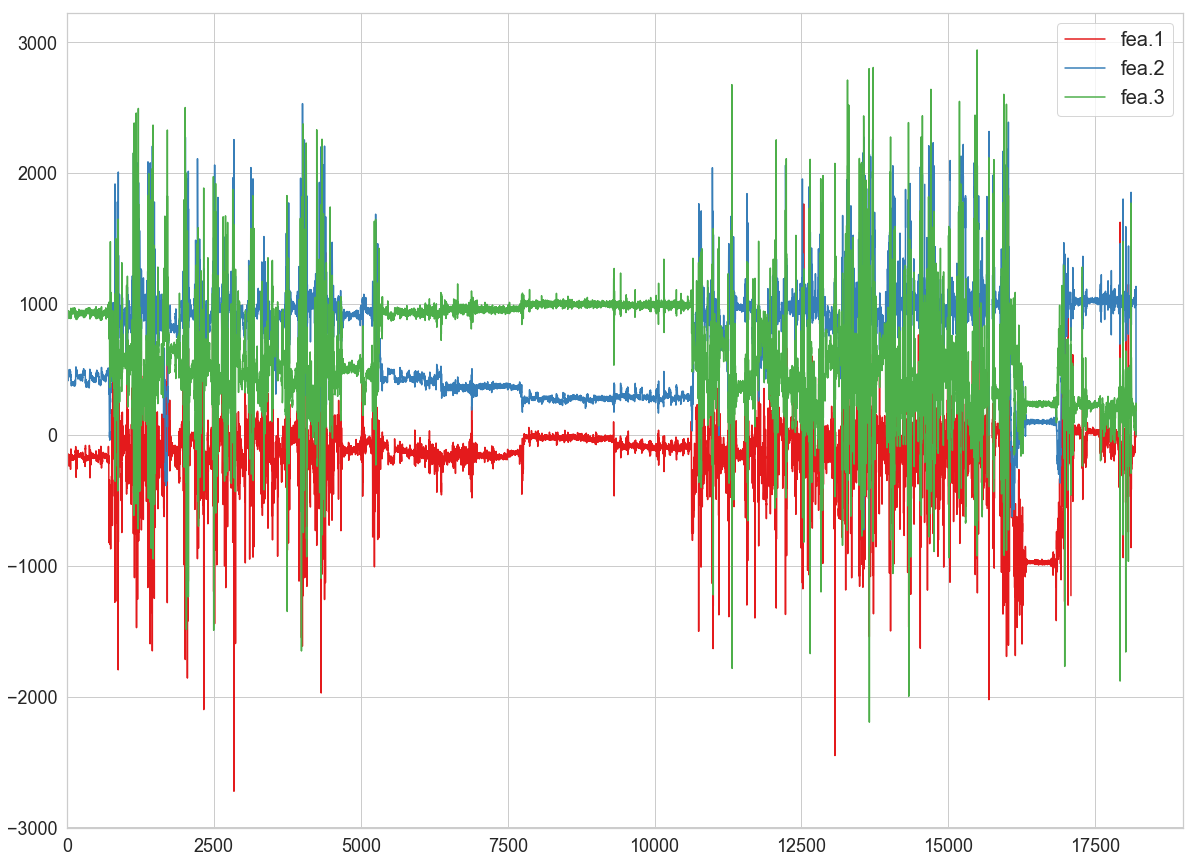

In [0]:
plt.figure()
df_A.iloc[:,:3].plot(figsize=(20,15)) # Plot the first 3 variables
plt.show()

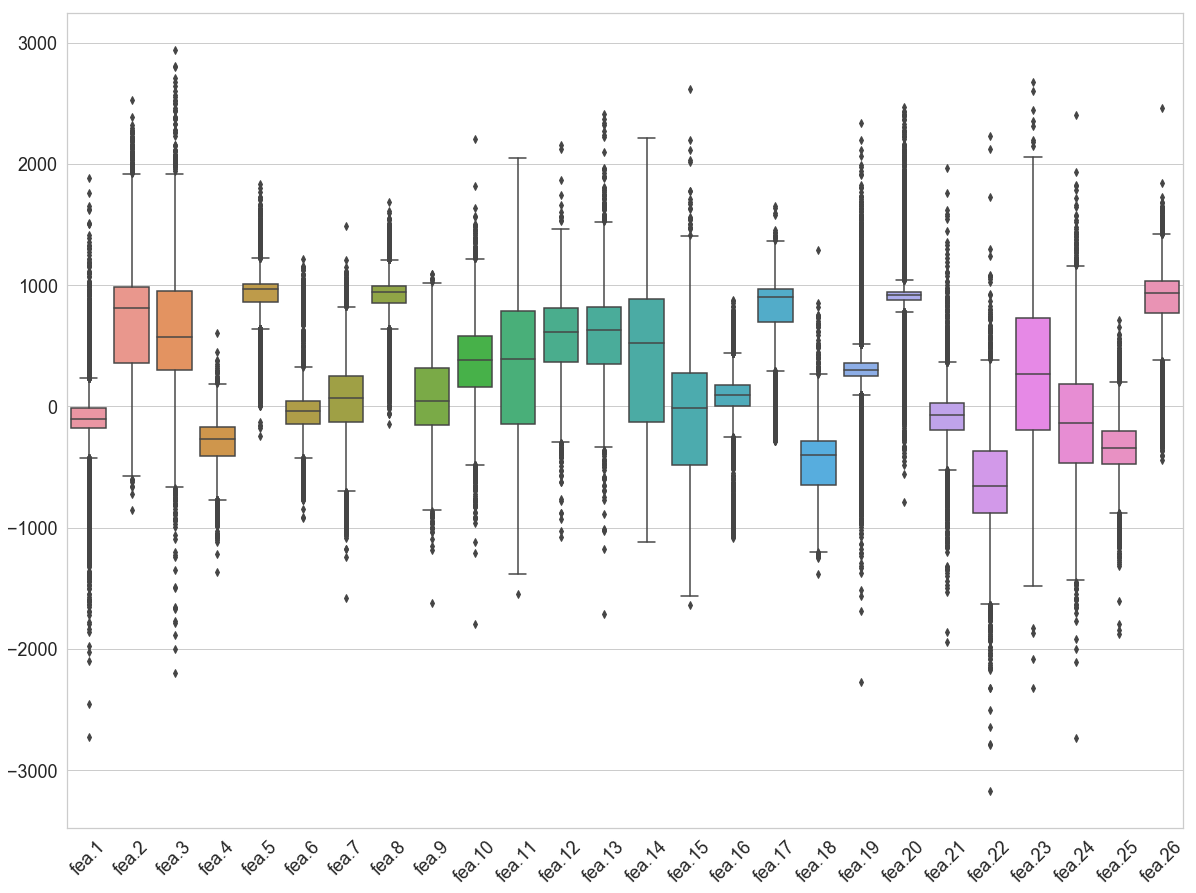

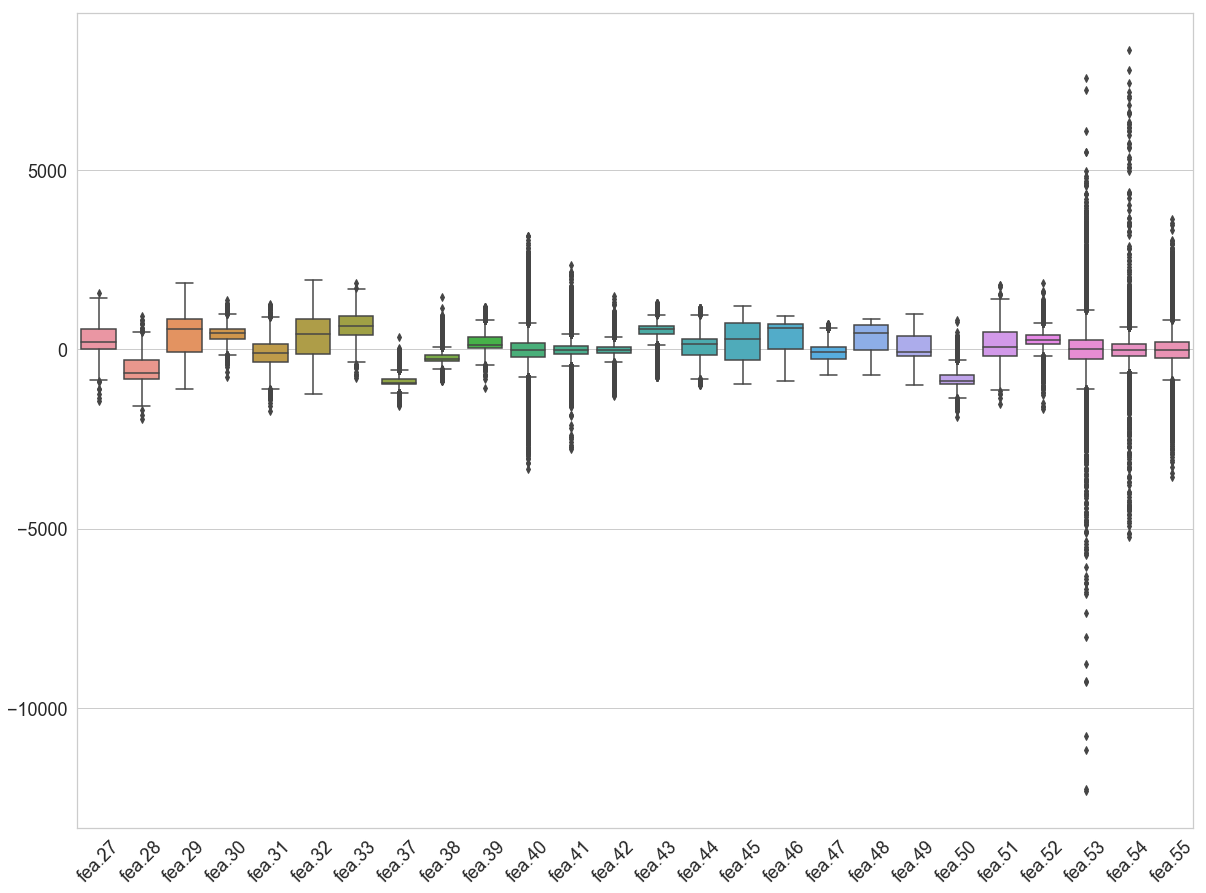

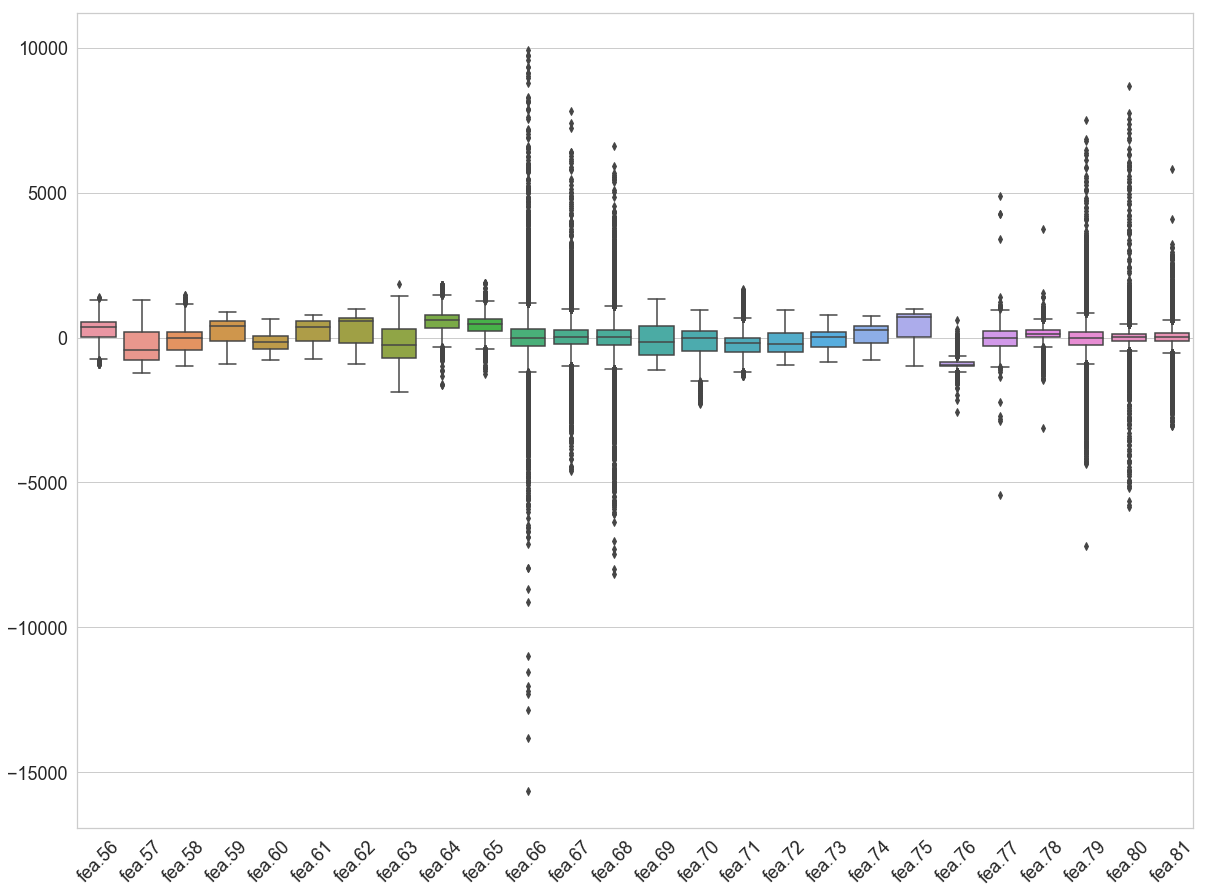

In [0]:
#Graph the box plots for the first third of the features 
figure = plt.figure(figsize=(20,15))
sns.boxplot(data=df_A.iloc[:,:round(len(df_A.columns)/3)]) #Graph the box plots for the first third of the features 
plt.xticks(rotation=45)
plt.show()

#Graph the second third of the features 
figure = plt.figure(figsize=(20,15))
sns.boxplot(data=df_A.iloc[:,round(len(df_A.columns)/3):round(2*len(df_A.columns)/3)])
plt.xticks(rotation=45)
plt.show()

#Graph the last third of the features 
figure = plt.figure(figsize=(20,15))
sns.boxplot(data=df_A.iloc[:,round(2*len(df_A.columns)/3):])
plt.xticks(rotation=45)
plt.show()

### 2.	Fix the detected problems using some of the methods discussed in class.
#### Removing Missing Values
Columns like "fea.34" through "fea.36" where there is not enough information to fill the missing values were removed, as those columns only had one row with a value of 0, the rest being NaN. The rest of the missing values could had been replaced with the mean or the median of the column as to not loose information, but due to the nature of the dataset, which is time-series based, it was determined it was better for the missing values to be replaced using an interpolation approach as mentioned in [10] and [11]. The interpolation of the DataFrame was made only between existing values, and thus assured that no missing values between samples that contained information persisted. Nonetheless some missing values remained at the end of the dataset. These lingering values were only present in the last 30 rows, and, as it was not possible to interpolate them and replacing those values with the mean or the median would not make sense in a time series, they were deleted from the dataset. After the missing values process, 78 attributes and 18197 samples remained.
#### Handling Outliers
The histograms of features 9 and 24 were used as a base to show the outlier removal procedure and can be seen in the figure below. The figure includes the mean and the three standard deviations cut-off range.


For the removal of outliers, the Z-Score, the Tukey Fence based on the Inter Quartile Range (IQR), and the Winsor techniques were considered. 

The Z-Score uses the principle that any values outside of an n amount of standard deviations from the mean is an outlier, and therefore should be deleted from the sample [12].This technique is only valid when used in a normal distribution [13].

Contrary to Z-Score, the Tukey Fence can be used in data that does not follow a normal distribution. This technique uses the median and the inter quartile range as opposed to the mean and standard deviation in order to filter out the outliers [14].The Tukey fence states that an outlier is any value outside of the range comprised of the first quartile -1.5 times the IQR and third quartile + 1.5times the IQR.

The winsorization technique picks a nth percentile to truncate and replace the values of a distribution. This means that the data below the nth percentile is replaced with the value found in that nth percentile, and the values over the (100-n)th percentile become the values found in the (100-n)th percentile [15].

##### Z-score
When the box plot figures were examined, it seemed like most of the features did not follow a normal distribution. To prove the previous statement a normality test based on Scipy's library was used [16].The test showed than none of the 78 features followed a normal distribution. Nonetheless, the Z-Score technique for outlier removal was still analyzed in the assignment and compared to the other methods as an academic exercise.

In [0]:
#Create a function to test the normality for each variable using scikit's normality test
alpha = 1e-3
def test_normal(col, string=''):
    k2, p = stats.normaltest(col)
    
    if string != '':
        if p >= alpha:  # null hypothesis: x comes from a normal distribution
            print("The null hypothesis cannot be rejected: The feature: " + string + " may come from a normal distribution")
    #    else:
    #        print("The null hypothesis can be rejected: The feature: " + string + " does not come from a normal distribution")
    return p

#Check each feature and see if it fits a normal distribution. Print the amount of features that did pass
p_values=[test_normal(df_A_inter[col], col) for col in df_A_inter.columns]
num_normal = sum([value>alpha for value in p_values])
print("There are " + str(num_normal) + " features that passed the normality test")

There are 0 features that passed the normality test


In [0]:
#Create a function that plots the histogram of a dataframe's column, and optionally displays certain characteristics
def histPlot(df, bins_value='auto', std_dev=3, mean_=True, iqr=0, plot_color='teal', title_extra='',
             alpha_val=0.8, new_fig=True):
    if new_fig == True:
        figure = plt.figure(figsize=(20,10))
    if isinstance(bins_value, int):
        if bins_value>0:
            bins_val = bins_value
        else:
            bins_val = np.histogram_bin_edges(df.values, 'auto')
    else:
        bins_val = np.histogram_bin_edges(df.values, str(bins_value))
    
    df.plot.hist(bins = bins_val, color = plot_color,
                                  title='Histogram for ' + str(df.name) + ' ' + str(title_extra),
                 legend = True, alpha = alpha_val)
    if mean_ == True:
        plt.axvline(df.values.mean(), color='k', linestyle ='dashed', linewidth = 3, label = 'Mean', alpha = 0.3)
    if std_dev != 0:
        plt.axvline(df.values.mean() + std_dev * df.values.std(),
                    color='k', linestyle='dotted', linewidth=3.5, label = str(std_dev) + ' Std deviation', alpha=0.4)
        plt.axvline(df.values.mean() - std_dev * df.values.std(),
                    color='k', linestyle='dotted', linewidth=3.5, alpha=0.4)
    if iqr != 0:
        q1, q3 = np.percentile(df, [25, 75])
        iqr_fence = (q3 - q1) * iqr
        low_fence = q1 - iqr_fence
        up_fence = q3 + iqr_fence
        plt.axvline(low_fence,
                    color='k', linestyle='-.', linewidth=2, label = 'Tukey Fence', alpha=0.3)
        plt.axvline(up_fence,
                    color='k', linestyle='-.', linewidth=2, alpha=0.3)
        
    plt.legend(loc='best')
#     plt.tight_layout()

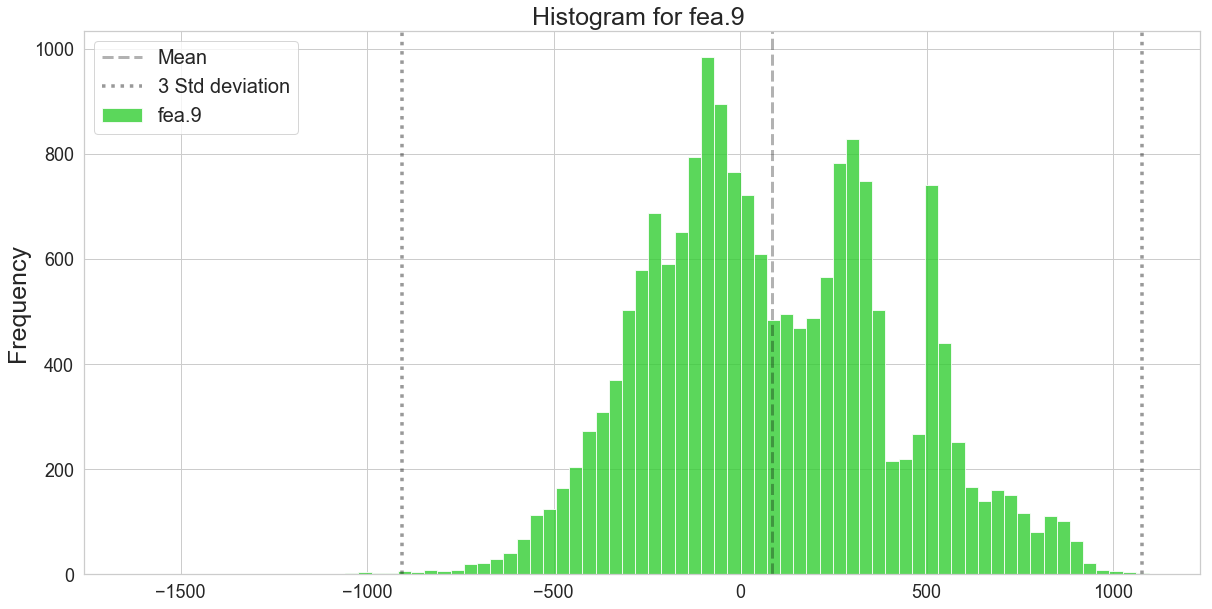

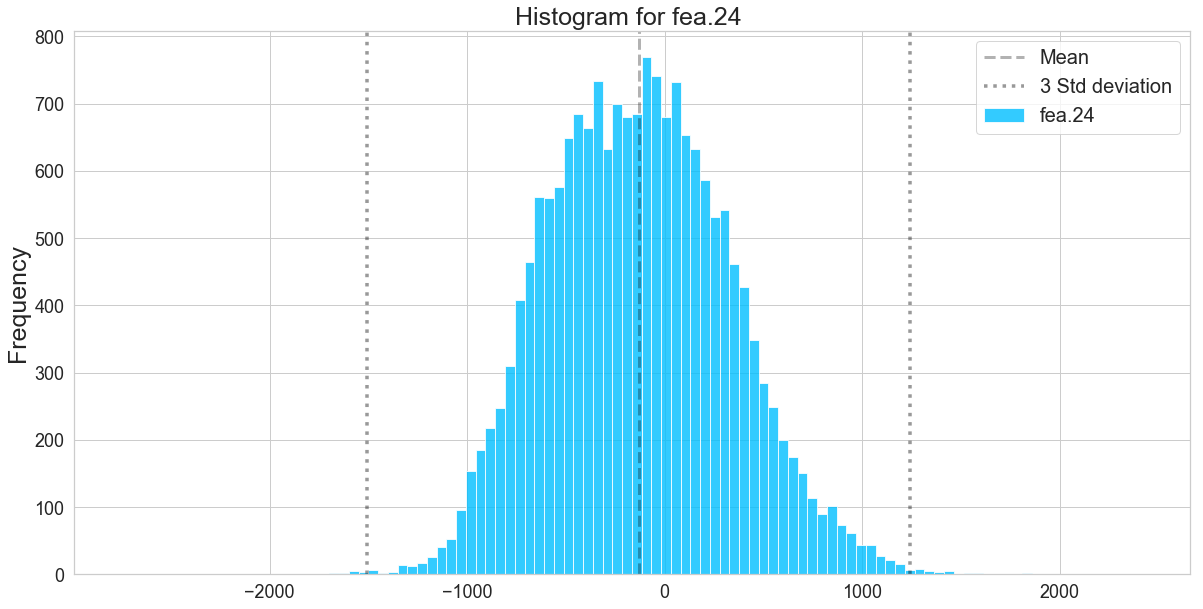

In [0]:
histPlot(df_A_inter['fea.9'], bins_value='auto', std_dev=3, plot_color='limegreen')  
histPlot(df_A_inter['fea.24'], bins_value='auto', std_dev=3, plot_color='deepskyblue')  

Using the histogram plot, the outliers can be seen as values that lay at both tails of the distribution. If a normal distribution is assumed for the features of the dataset, it can be expected for the features to have 99.7% of its values between three standard deviations of the mean of the samples [17]. The figure below shows features "fea.9" and "fea.24" with the mean and the three standard deviations cut-off range.

In [0]:
#Technique using the z-score to remove the outliers
# Based on https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html, 
df_A_zscore=df_A_inter[(np.abs(stats.zscore(df_A_inter)) < 3).all(axis=1)]

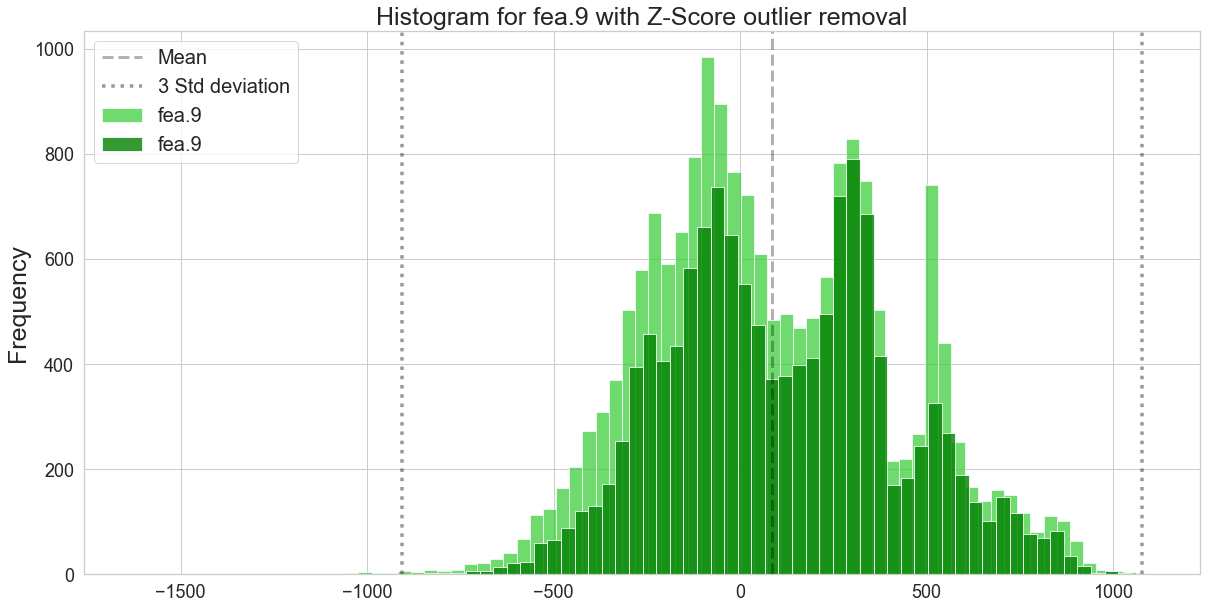

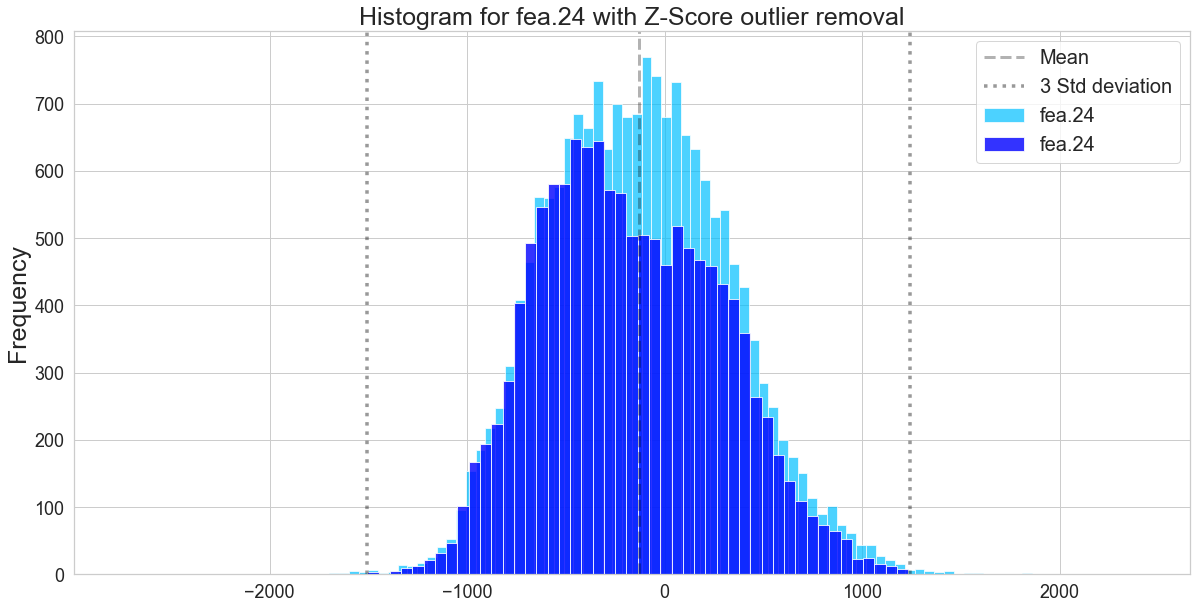

In [0]:
#Plot the histograms for feature 9
histPlot(df_A_inter['fea.9'], bins_value="auto", std_dev=3, plot_color='limegreen', alpha_val=0.7)
histPlot(df_A_zscore['fea.9'], bins_value="auto", std_dev=0, mean_=False, plot_color='g',
         title_extra= 'with Z-Score outlier removal',new_fig=False)  

#Plot the histograms for feature 24
histPlot(df_A_inter['fea.24'], bins_value='auto', std_dev=3, plot_color='deepskyblue', alpha_val=0.7) 
histPlot(df_A_zscore['fea.24'], bins_value='auto', std_dev=0, mean_=False, plot_color='b',
         title_extra= 'with Z-Score outlier removal', new_fig=False)

##### Tukey Fence
The Tukey Fences were used with the default value of 1.5, and the resulting histograms can be seen in the figure below.

In [0]:
#Inter Quartile Range calculation and outlier removal
#Based on the function created by: http://colingorrie.github.io/outlier-detection.html
df_A_IQR=df_A_inter.copy()
for i in range(len(df_A_IQR.columns)):
    q1, q3 = np.percentile(df_A_inter.iloc[:,i], [25, 75])
    iqr_fence = (q3 - q1) * 1.5
    low_fence = q1 - iqr_fence
    up_fence = q3 + iqr_fence
    df_A_IQR=df_A_IQR[(df_A_IQR.iloc[:,i] < up_fence)]
    df_A_IQR=df_A_IQR[(df_A_IQR.iloc[:,i] > low_fence)]

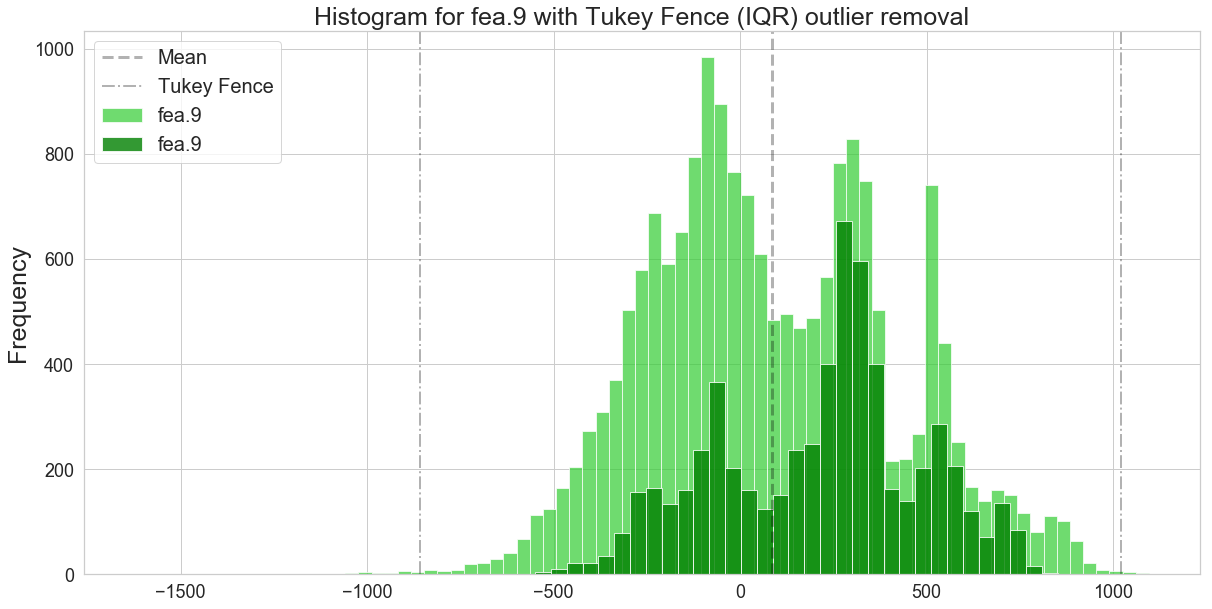

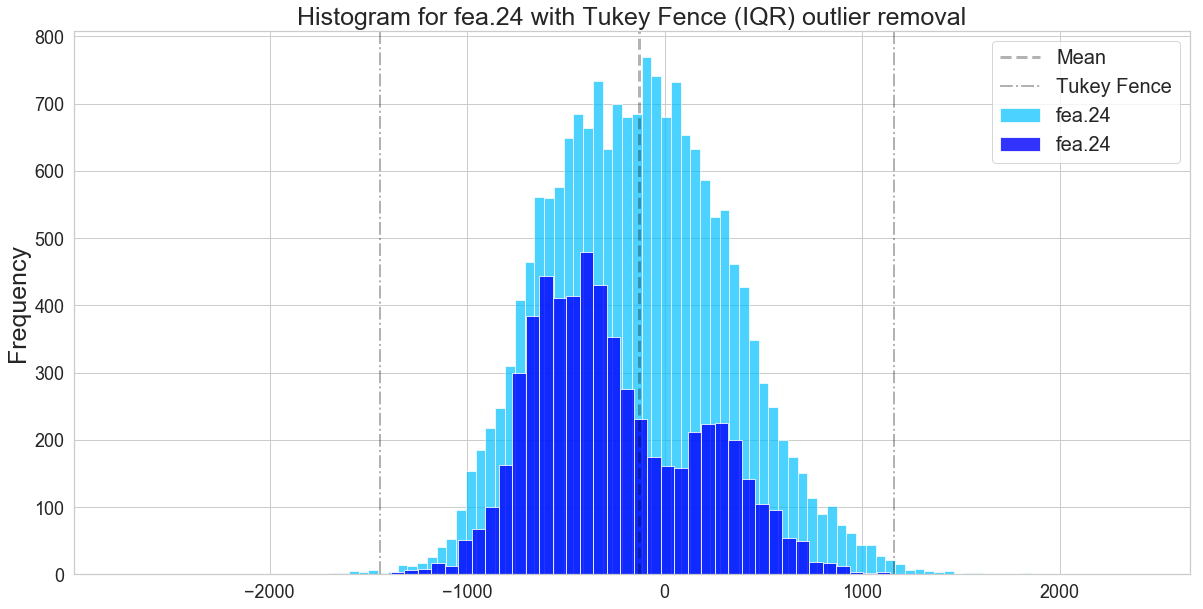

In [0]:
#Plot the histograms for feature 9
histPlot(df_A_inter['fea.9'], bins_value="auto", plot_color='limegreen', iqr=1.5, std_dev=0, alpha_val=0.7)
histPlot(df_A_IQR['fea.9'], bins_value="auto", std_dev=0, mean_=False, plot_color='g',
         title_extra= 'with Tukey Fence (IQR) outlier removal',new_fig=False)  

#Plot the histograms for feature 24
histPlot(df_A_inter['fea.24'], bins_value='auto', plot_color='deepskyblue', iqr=1.5, std_dev=0, alpha_val=0.7) 
histPlot(df_A_IQR['fea.24'], bins_value='auto', std_dev=0, mean_=False, plot_color='b',
         title_extra= 'with Tukey Fence (IQR) outlier removal', new_fig=False)

##### Winsorization
The Winsor technique was used with a cut-off value of 0.5% for each tail of the distribution as shown in Figure 6.

In [0]:
#Winsorization technique based on:
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.winsorize.html
df_A_winsor=df_A_inter.copy()
for column in df_A_inter:
    df_A_winsor.loc[:,column]=stats.mstats.winsorize(df_A_inter[column], limits = (0.005, 0.005))

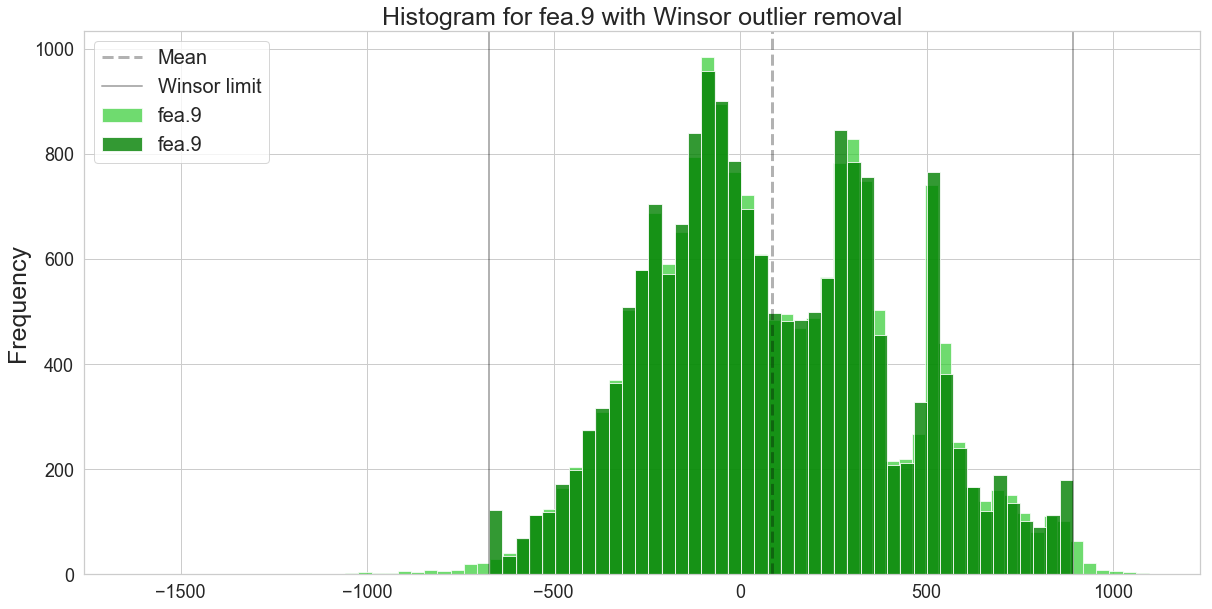

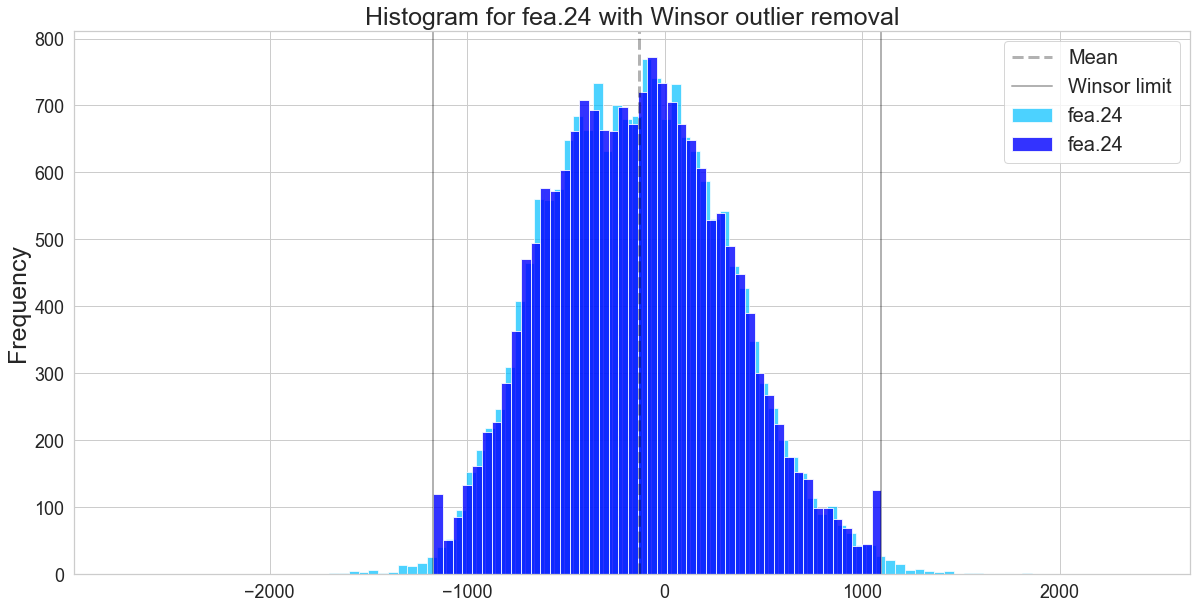

In [0]:
#Plot the histogram for feature 9
histPlot(df_A_inter['fea.9'], bins_value="auto", plot_color='limegreen', std_dev=0, alpha_val=0.7)
histPlot(df_A_winsor['fea.9'], bins_value="auto", std_dev=0, mean_=False, plot_color='g',
         title_extra= 'with Winsor outlier removal',new_fig=False)
maxi = df_A_winsor['fea.9'].max()
mini = df_A_winsor['fea.9'].min()
plt.axvline(maxi,
            color='k', linestyle='-', linewidth=2, label = 'Winsor limit', alpha=0.3)
plt.axvline(mini,
            color='k', linestyle='-', linewidth=2, alpha=0.3)
plt.legend(loc='best')

#Plot the histogram for feature 24
histPlot(df_A_inter['fea.24'], bins_value='auto', plot_color='deepskyblue', std_dev=0, alpha_val=0.7) 
histPlot(df_A_winsor['fea.24'], bins_value='auto', std_dev=0, mean_=False, plot_color='b',
         title_extra= 'with Winsor outlier removal', new_fig=False)
maxi = df_A_winsor['fea.24'].max()
mini = df_A_winsor['fea.24'].min()
plt.axvline(maxi,
            color='k', linestyle='-', linewidth=2, label = 'Winsor limit', alpha=0.3)
plt.axvline(mini,
            color='k', linestyle='-', linewidth=2, alpha=0.3)
plt.legend(loc='best')
plt.show()

The effect of the outlier removal with each technique can be seen in the figure and table below

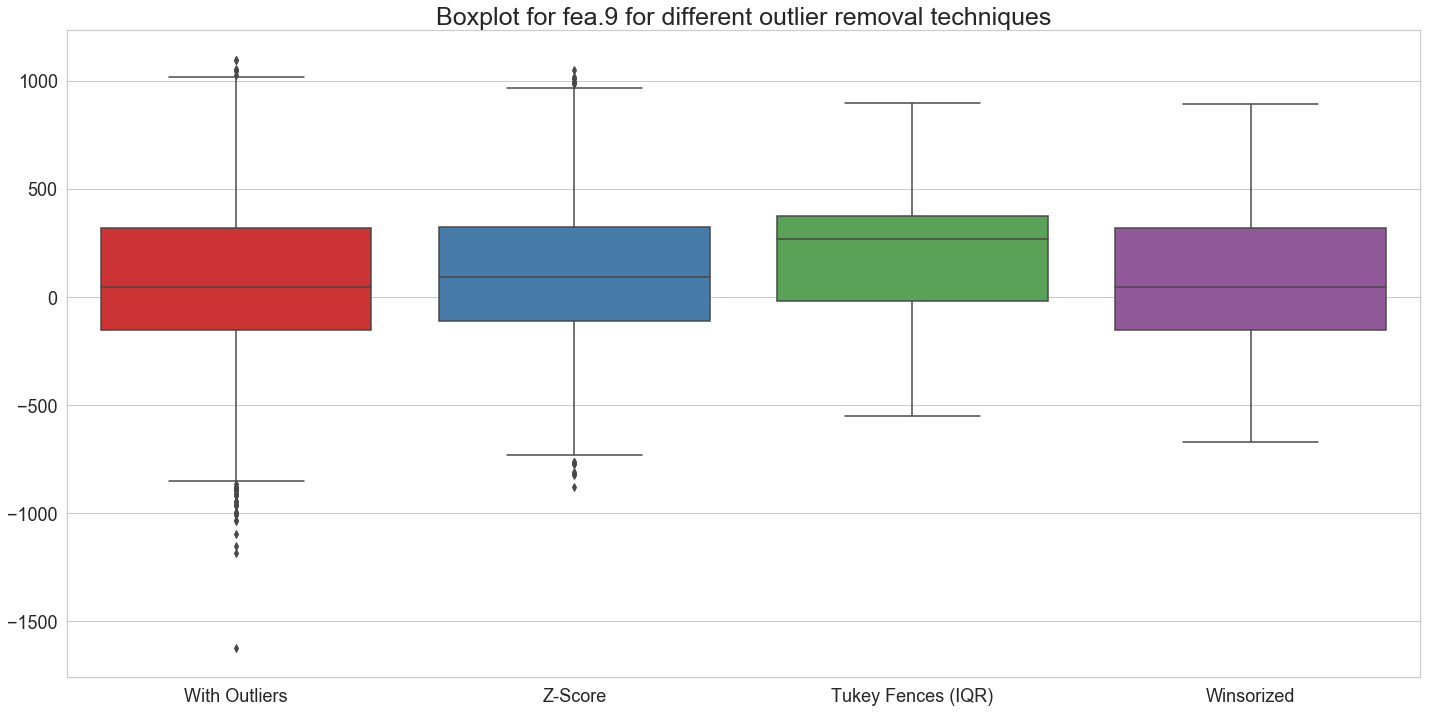

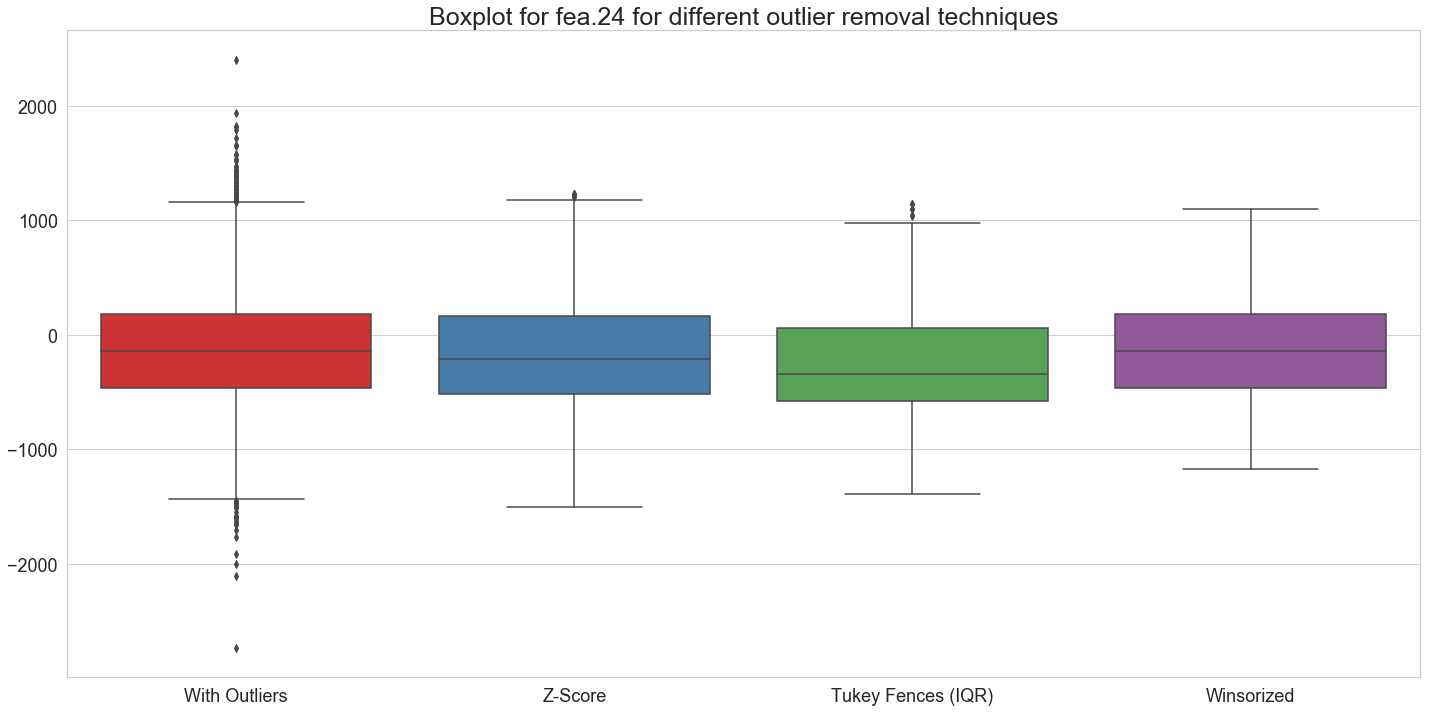

In [0]:
#Create a boxplot of the feature 9 of each of the previous calculated DataFrames
boxplot=pd.DataFrame(df_A_inter['fea.9'])
boxplot=pd.concat([boxplot,pd.DataFrame(df_A_zscore['fea.9'])], axis=1)
boxplot=pd.concat([boxplot,pd.DataFrame(df_A_IQR['fea.9'])], axis=1)
boxplot=pd.concat([boxplot,pd.DataFrame(df_A_winsor['fea.9'])], axis=1)
boxplot.columns = ['With Outliers','Z-Score','Tukey Fences (IQR)','Winsorized']
figure = plt.figure(figsize=(20,10))
ax = sns.boxplot(data=boxplot)
ax.set_title('Boxplot for fea.9 for different outlier removal techniques')
plt.tight_layout()

#Create a boxplot of the feature 24 of each of the previous calculated DataFrames
boxplot=pd.DataFrame(df_A_inter['fea.24'])
boxplot=pd.concat([boxplot,pd.DataFrame(df_A_zscore['fea.24'])], axis=1)
boxplot=pd.concat([boxplot,pd.DataFrame(df_A_IQR['fea.24'])], axis=1)
boxplot=pd.concat([boxplot,pd.DataFrame(df_A_winsor['fea.24'])], axis=1)
boxplot.columns = ['With Outliers','Z-Score','Tukey Fences (IQR)','Winsorized']
figure = plt.figure(figsize=(20,10))
ax = sns.boxplot(data=boxplot)
ax.set_title('Boxplot for fea.24 for different outlier removal techniques')
plt.tight_layout()

In [0]:
#Create a DataFrame that contains the main statistical values of the features 9 and 24
statInfo = pd.DataFrame(df_A_inter['fea.9'].describe())
statInfo = pd.concat([statInfo,df_A_zscore['fea.9'].describe()], axis=1)
statInfo = pd.concat([statInfo,df_A_IQR['fea.9'].describe()], axis=1)
statInfo = pd.concat([statInfo,df_A_winsor['fea.9'].describe()], axis=1)

statInfo = pd.concat([statInfo,df_A_inter['fea.24'].describe()], axis=1)
statInfo = pd.concat([statInfo,df_A_zscore['fea.24'].describe()], axis=1)
statInfo = pd.concat([statInfo,df_A_IQR['fea.24'].describe()], axis=1)
statInfo = pd.concat([statInfo,df_A_winsor['fea.24'].describe()], axis=1)
statInfo.columns = pd.MultiIndex.from_arrays([['Feature 9', 'Feature 9', 'Feature 9', 'Feature 9',
                                  'Feature 24', 'Feature 24', 'Feature 24', 'Feature 24'],
                                ['With Outliers','Z-Score','Tukey Fences (IQR)','Winsorized',
                                 'With Outliers','Z-Score','Tukey Fences (IQR)','Winsorized']])
statInfo

Feature 9                                                 \
      With Outliers       Z-Score Tukey Fences (IQR)    Winsorized   
count  18197.000000  13155.000000        6008.000000  18197.000000   
mean      85.087597    113.159461         213.089880     85.565661   
std      330.346556    306.913797         272.274201    327.905124   
min    -1624.000000   -881.000000        -550.000000   -673.000000   
25%     -153.000000   -112.000000         -19.000000   -153.000000   
50%       44.000000     92.000000         265.000000     44.000000   
75%      317.000000    321.000000         373.000000    317.000000   
max     1096.000000   1050.000000         894.000000    892.000000   

         Feature 24                                                 
      With Outliers       Z-Score Tukey Fences (IQR)    Winsorized  
count  18197.000000  13155.000000        6008.000000  18197.000000  
mean    -131.387729   -173.953619        -257.232488   -131.353977  
std      458.378557    452.091849         418.772140    452.542630  
min    -2734.000000  -1505.000000       -1387.000000  -1172.000000  
25%     -467.000000   -519.000000        -575.000000   -467.000000  
50%     -138.000000   -215.000000        -340.000000   -138.000000  
75%      183.000000    163.000000          56.250000    183.000000  
max     2401.000000   1232.000000        1142.000000   1096.000000

The box plots show that the outlier removal techniques reduced considerably the number of outliers present in each feature. The Winsorization technique was the one that reduced the most outliers and kept the mean almost intact, at the cost of changing the range of the feature the most. The IQR technique managed to affect the quantiles in a lesser degree compared to the Winsorization technique, but was the technique that had the maximum effect in the median. Z-Score was the technique that had a minimal disruption in the quantiles without modifying the median in a high degree, at the expense of removing a lesser number of outliers. 

For the feature 9, the boxplot shows the outliers in both the negative and the positive ranges, with minimum and maximum values of -1624 and 2202, respectively for the feature without the outlier removal. Table 2 also shows that the maximum value is 1096, an Inter Quartile Range (IQR) is 470 and mean of 85.09. In the Z-Score instance with a cut-off of 3 standard deviations, the boxplot indicated that the atypical values have been reduced considerably and the range was reduced between -881 and 1050, with a diminished IQR of 433 and an augmented mean of 113.16. The disadvantage of this procedure is that the mean was displaced considerably. This is without taking into account that there are still some atypical values present. The Tukey Fences instance reduced the range of the data to be between-550 and 894 with a decreased IQR of 392. This technique had the largest displacement in the mean, modifying it to 213.09. The Winsorized instance using 1% as the cutoff shows a dramatic reduction in the number of outliers, with all of the samples in the dataset still present. The range of this technique was between -673 to 892 maintaining the same IQR of 470 as the unmodified attribute and a similar mean of 85.57. 

For the feature 24, Z-Score also reduced the range of the data and changed the mean but increased the IQR compared to the effect in feature 9. Similarly, Tukey Fences had a reduction of the range and IQR as well and an abrupt alteration of the mean. Likewise, the Winsorization had a trivial effect on the IQR and the mean.

The Z-Score and the Tukey Fences techniques lost 6000 and 12000 samples in their data, respectively, while the Winsorized maintained them all although with a new value, which might bias the dataset if it was not correctly used.

Overall, it might be inferred that the winsor technique has a better performance and less impact on the data distribution without the loss of samples. Nonetheless, the exercise asked for the methods seen in class to be used, therefore the rest of the assignment was solved using the Z-Score technique and its resulting DataFrame.


In [0]:
#Select the chosen DataFrame: inter, Z-Score, IQR, or winsor to use in the rest of the assignment
df_A_noOutliers = df_A_zscore.copy() 

### 3.	Normalize the data using min-max and Z-Score normalization. Plot histograms of feature 9 and 24; compare and comment on the diﬀerences before and after normalization.

For the normalization of the data, the min-max and Z-Score techniques were applied.
#### Min Max 
The Min Max scaling (also called “normalization”) targets to limit the range of the data to 0-1. This technique is based on scikit-learn's MinMaxScaler(). The Min Max scaling was applied to the entirety of the dataset, and the results for the feature 9 and 24 can be seen in the table below. The resulting array had a minimum value of 0 and a maximum value of 1 for all of its features as expected. As all the samples now have the same scale, it is also possible to compare them directly, without running the risk of a feature with larger values overshadowing one with smaller values.

In [0]:
from sklearn import preprocessing #Import preprocessing from the scikit library

minmax_scale = preprocessing.MinMaxScaler().fit(df_A_noOutliers) #Create the min-max fitting model
df_minmax = minmax_scale.transform(df_A_noOutliers) #Apply the model to the DF
#Recreate the array as a DF and copy the column names, for easier viewing:
df_minmax = pd.DataFrame(df_minmax, columns=df_A_noOutliers.columns)
#df_minmax #Show the DF

In [0]:
pd.concat([(pd.DataFrame(df_minmax['fea.9'].describe())), pd.DataFrame(df_minmax['fea.24'].describe())], axis=1)

,fea.9,fea.24
count,13155.000000,13155.000000
mean,0.514842,0.486316
std,0.158940,0.165178
min,0.000000,0.000000
25%,0.398239,0.360248
50%,0.503884,0.471319
75%,0.622475,0.609426
max,1.000000,1.000000


#### Z-Score
The Z-Score scaling tries to limit the range of the features to make them have a mean of 0 and a standard deviation of 1. It was based on scikit-learn's StandardScaler() function. This technique was also applied to the entirety of the dataset, and the results for feature 9 and 24 can be seen in the table below. The resulting array had, as was mentioned previously, a mean of 0 and a standard deviation of 1.

In [0]:
std_scale = preprocessing.StandardScaler().fit(df_A_noOutliers) #Create the fitting model
df_standardized = std_scale.transform(df_A_noOutliers) #Apply the model to the DF
#Recreate the array as a DF and copy the column names, for easier viewing:
df_standardized = pd.DataFrame(df_standardized, columns=df_A_noOutliers.columns) 
#df_standardized #Show the DF

In [0]:
pd.concat([(pd.DataFrame(df_standardized['fea.9'].describe())), pd.DataFrame(df_standardized['fea.24'].describe())], axis=1)

,fea.9,fea.24
count,1.315500e+04,1.315500e+04
mean,-5.285354e-16,-5.213955e-17
std,1.000038e+00,1.000038e+00
min,-3.239337e+00,-2.944307e+00
25%,-7.336523e-01,-7.632509e-01
50%,-6.894531e-02,-9.079558e-02
75%,6.772209e-01,7.453495e-01
max,3.052571e+00,3.110003e+00


The resulting histograms of features 9 and 24 for both of the feature scaling techniques can be seen in the figure below. Visualizing feature 9, the normalization and standardization changes the maximum and minimum values, making them between 0 and 1 for the min-max and between -3 and 3 for the Z-Score, compared to the -1000 and 1000 found in the original scale. As was expected, the standardization and normalization techniques did not change the distribution of the data.

The same was achieved with feature 24, and the scale of the histogram was also modified to 0 and 1 for the min-max, and -2.5 to 2.5 for the Z-Score, without changing the data distribution.

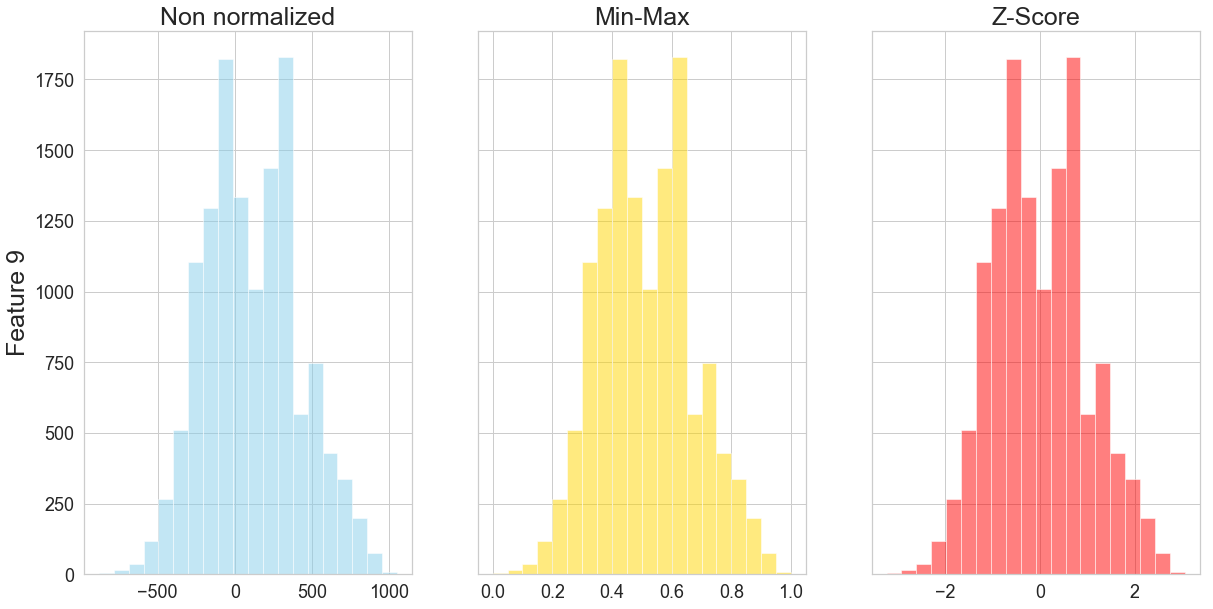

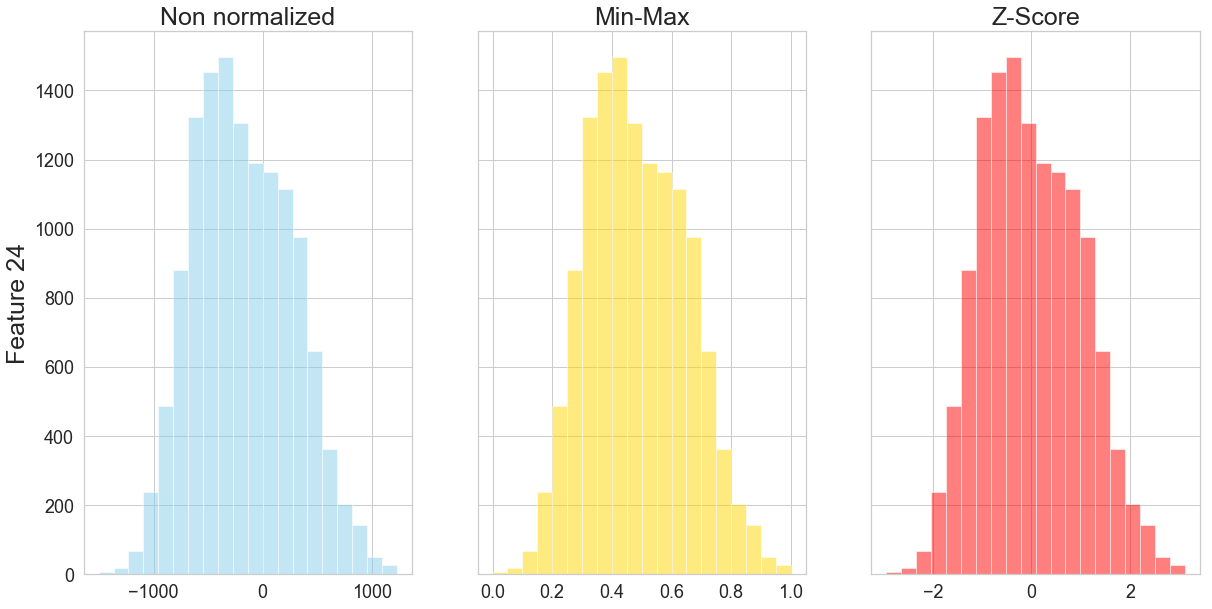

In [0]:
hist1=df_A_noOutliers['fea.9']
hist2=df_minmax['fea.9']
hist3=df_standardized['fea.9']

fig, ax = plt.subplots(1,3, sharey=True, figsize=(20,10))

alphaVal=0.5
binsVal=20

ax[0].hist(hist1, bins=binsVal, color='skyblue', alpha=alphaVal) 
ax[0].set_title('Non normalized')
ax[0].set_ylabel('Feature 9')
ax[1].hist(hist2, bins=binsVal, color='gold', alpha=alphaVal)
ax[1].set_title('Min-Max')
ax[2].hist(hist3, bins=binsVal, color='red', alpha=alphaVal)
ax[2].set_title('Z-Score')
plt.show()

hist4=df_A_noOutliers['fea.24']
hist5=df_minmax['fea.24']
hist6=df_standardized['fea.24']

fig, ax = plt.subplots(1,3, sharey=True, figsize=(20,10))

alphaVal=0.5
binsVal=20

ax[0].hist(hist4, bins=binsVal, color='skyblue', alpha=alphaVal)
ax[0].set_title('Non normalized')
ax[0].set_ylabel('Feature 24')
ax[1].hist(hist5, bins=binsVal, color='gold', alpha=alphaVal)
ax[1].set_title('Min-Max')
ax[2].hist(hist6, bins=binsVal, color='red', alpha=alphaVal)
ax[2].set_title('Z-Score')
plt.show()

## II. Feature Extraction (for dataset B)

In [0]:
##--Importing necessary libraries
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

As specified by the Assignment document, Dataset B is a dataset of Handwritten digits 0 to 4 (5 classes).

Upon opening the dataset B using a program that can interpret text files, it can be seen that the dataset contains a total of 784 columns and 2066 rows, including an index and a header. The header of the file indicates that the features' names are in the format of "fea" followed by a period and a number. The features are numerical in nature and does not contain missing values.

In [0]:
#Load B Dataset
df_B = pd.read_csv('DataB.csv', delimiter = ",", header=0, index_col=0)
df_X = df_B.iloc[:,:-1]
df_y = df_B.iloc[:,-1]

### 1. Use PCA as a dimensionality reduction technique to the data, compute the eigenvectors and eigenvalues.

The covariance matrix of the dataframe was computed in order to get the eigen values and eigen vectors  The first 10 values are displayed below and the complete list can be recalled using the variables eigen_values and eigen_vectors in the complementary code.

In [0]:
#Covariance matrix and (eigenvalues, eigenvectors)
df_cov = df_X.cov()
eigen_values, eigen_vectors= np.linalg.eig(df_cov)
divide_ = sum(eigen_values)
eigen_values = pd.DataFrame(eigen_values)
eigen_values

,0
0,467242.206542
1,278894.145514
2,213480.283837
3,205514.153620
4,171638.869230
5,129473.255846
6,113282.522495
7,91366.583282
8,88194.830373
9,72669.596413


In [0]:
#first and second principal components
eigen_vectors = pd.DataFrame(eigen_vectors)
principal_components = eigen_vectors.iloc[:,:2]
principal_components

,0,1
0,3.610673e-05,-0.000041
1,1.888739e-05,-0.000026
2,-1.226861e-05,0.000072
3,-5.564064e-05,0.000016
4,4.975886e-06,-0.000022
5,8.302337e-05,0.000009
6,-2.131626e-05,0.000070
7,-4.570491e-05,-0.000073
8,-6.994663e-05,0.000001
9,-2.911614e-05,0.000051


In [0]:
#PCA with first and second principal component
model = PCA(n_components=2)
projected = pd.DataFrame(model.fit_transform(df_X))
projected

,0,1
0,1069.166339,-513.971025
1,1099.176100,-570.839734
2,673.201403,-167.383000
3,1010.903334,-187.042511
4,1692.970882,-633.371228
5,1341.694352,-536.769323
6,1217.832616,-521.314032
7,226.761202,-457.322850
8,1219.222310,-479.279970
9,900.753284,-548.128858


### 2. Plot a 2 dimensional representation of the data points based on the first and second principal components. Explain the results versus the known classes (display data points of each class with a different color).

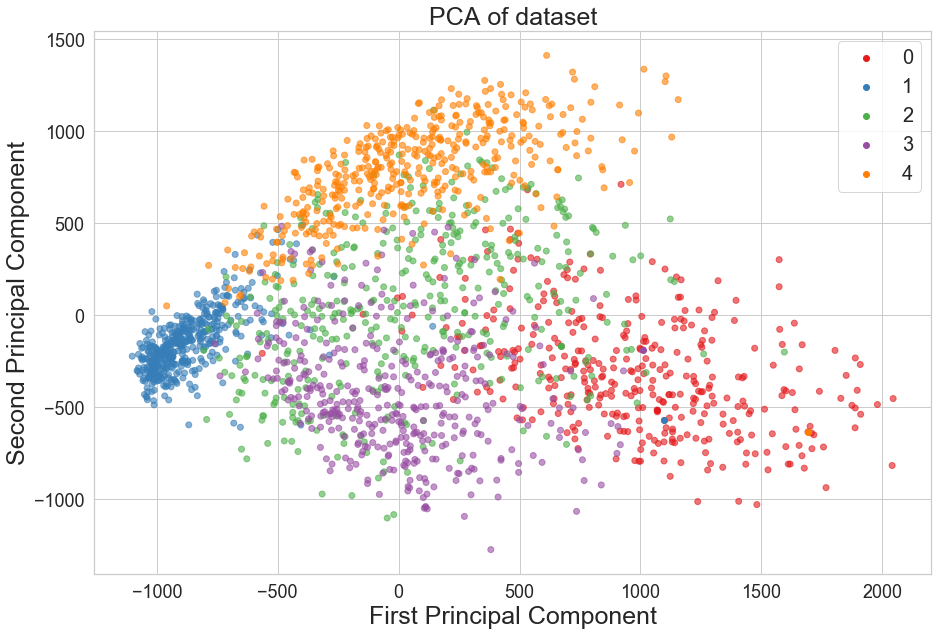

In [0]:
#Plotting results with PCA first and second principal components
#colors={0:'darkred' , 1:'navy' , 2:'darkorange' , 3:'forestgreen' , 4:'turquoise'}

col=df_y.map(plt.get_cmap('Set1'))
figure = plt.figure(figsize=(15,10))
ax = plt.scatter(projected.iloc[:,0], projected.iloc[:,1],  c=col, alpha = 0.6, label='')
for i in np.unique(df_y):
    plt.scatter(projected.iloc[i,0], projected.iloc[i,1], label=i)
plt.title('PCA of dataset')
plt.legend(loc='best')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

The plot above displays the different classes as they are visualized in the 2 dimensions created by the first two principal components, which help increase the effect the variance in the data has in order to make them more disperse and facilitates the distinction between the different groups. The range of the first two Principal Components is approximately 3000.
Even though the variance achieved using PCA is the maximum possible, it can be argued that looking at the plot as if it were a monochromatic graphic, it would be possible to discern only between two and three classes.

### 3. Repeat step 2 for the 5th and 6st components. Comment on the result.

In [0]:
#PCA with first six principal component
model = PCA(n_components=6)
projected6 = pd.DataFrame(model.fit_transform(df_X))
projected6

,0,1,2,3,4,5
0,1069.166301,-513.973122,-139.242442,-878.387270,-387.876309,-335.328306
1,1099.176072,-570.842440,-67.309913,-839.380476,-345.576975,-530.703234
2,673.201400,-167.377508,480.989113,-83.820331,-1036.830346,76.531386
3,1010.903347,-187.044785,506.353413,-426.446669,-901.891240,73.693645
4,1692.970814,-633.370181,-521.940110,-367.357831,6.919063,-601.720024
5,1341.694318,-536.770535,-578.490001,-246.428555,577.945831,140.187389
6,1217.832617,-521.313671,-116.351037,-240.549404,-680.657489,-501.851360
7,226.761153,-457.324927,-284.323288,-128.615217,1017.010091,-87.097949
8,1219.222309,-479.275020,8.019380,521.169131,-722.000624,196.055112
9,900.753270,-548.127890,30.262534,-46.961828,-761.672102,-435.269966


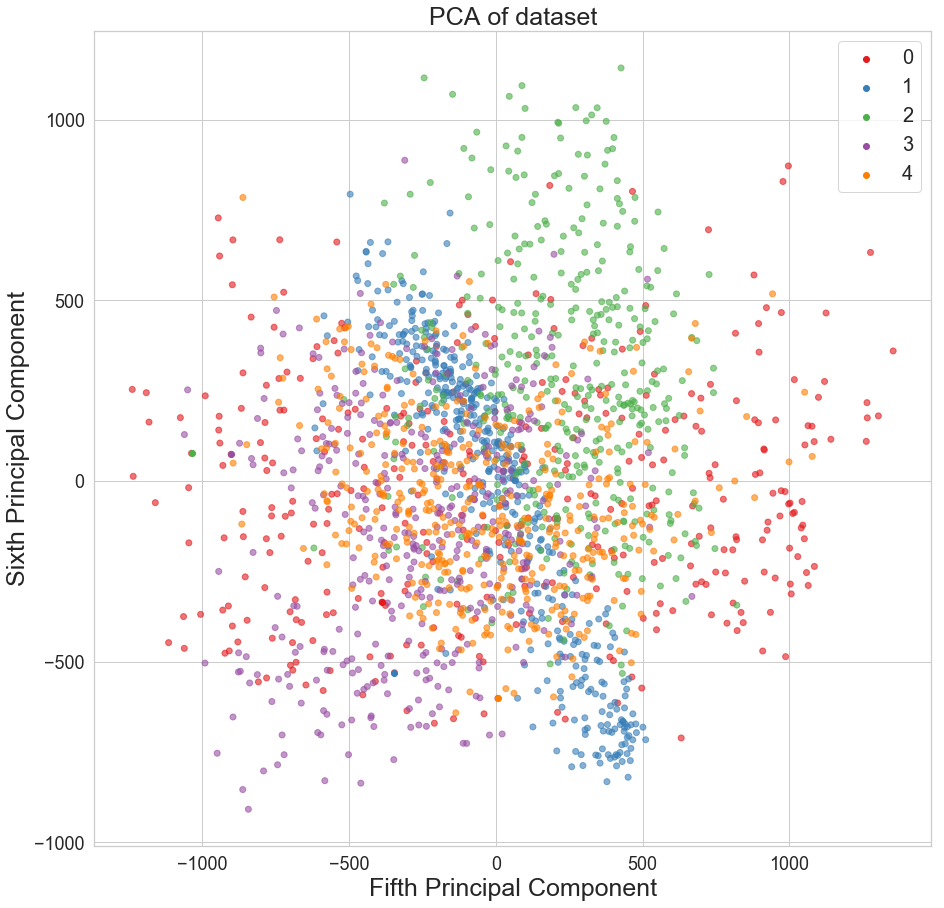

In [0]:
#Plotting results with 5th and 6th principal components
colors={0:'darkred' , 1:'navy' , 2:'darkorange' , 3:'forestgreen' , 4:'turquoise'}

col=df_y.map(plt.get_cmap('Set1'))
figure = plt.figure(figsize=(15,15))
plt.scatter(projected6.iloc[:,4], projected6.iloc[:,5],  c=col , alpha=0.6, label='')
for i in np.unique(df_y):
    plt.scatter(projected6.iloc[i,4], projected6.iloc[i,5], label=i)
plt.legend(loc='best')
plt.title('PCA of dataset')
plt.xlabel('Fifth Principal Component')
plt.ylabel('Sixth Principal Component')
plt.show()

The graph above displays the fifth and sixth Principal Components obtained using PCA. As the variance and dispersion of the features is more subdued in these Principal Components, the distinction between the classes is lesser compared to the one found in the graph with the first and second components. If the same monochromatic idea were to be applied to this figure, it can be argued that it would only be possible to distinguish between 1 and 2 classes.

### 4. Use the Naive Bayes classifier to classify 8 sets of dimensionality reduced data (using the first 2, 4, 10, 30, 60, 200, 500, and all 784 PCA components). Plot the classiffication error for the 8 sets against the retained variance of each case.

In [0]:
model784 = PCA()
projected784 = pd.DataFrame(model784.fit_transform(df_X))
projected784

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1069.166304,-513.973184,-139.243261,-878.387704,-387.873484,-335.304982,-189.857033,312.580046,111.445704,-125.322693,...,1.866970e+00,0.084891,-0.020108,1.687018,0.576924,0.338576,-0.041519,-0.533611,0.683888,0.238770
1,1099.176077,-570.842223,-67.311779,-839.381070,-345.573249,-530.737220,-516.056930,73.720660,9.525282,-329.657997,...,6.898612e-01,-0.453774,-0.425908,-0.357020,0.328161,-1.778184,-0.232896,0.092560,1.472755,-0.647717
2,673.201385,-167.377150,480.988638,-83.823068,-1036.833666,76.531663,-184.553283,311.406005,-122.135438,444.768606,...,1.616355e+00,-0.075662,-1.281379,0.806874,-0.852442,-1.466010,0.901360,0.563870,-0.318705,-1.407347
3,1010.903339,-187.044145,506.352247,-426.446929,-901.897549,73.661148,-316.674873,617.909186,-217.415113,135.694758,...,1.582237e-01,1.132823,1.522555,0.132399,0.735122,1.769569,-0.331854,-0.490687,-0.869740,-0.179703
4,1692.970822,-633.369398,-521.943052,-367.356716,6.919257,-601.851221,-515.146878,-325.773643,262.282233,321.254330,...,-2.484220e-01,0.019291,-0.059462,1.723846,0.548581,0.418587,0.177183,-0.689386,0.309217,0.016248
5,1341.694310,-536.770010,-578.489504,-246.425866,577.933576,140.191582,-698.380687,144.262094,486.957581,314.085981,...,-3.222658e-01,2.201212,0.003722,-0.368970,0.345119,-1.186437,-0.132119,0.063865,0.541003,-1.614036
6,1217.832623,-521.312900,-116.355397,-240.552050,-680.648563,-501.999433,-913.376790,-18.253232,33.072870,98.394066,...,-5.214346e-01,-1.008699,-0.564041,-0.085898,-0.202696,0.671090,0.122620,-0.738915,0.000874,-0.145653
7,226.761138,-457.324861,-284.321899,-128.615747,1017.001492,-87.023369,385.875869,-32.041779,-183.274818,-29.290437,...,-1.047898e-01,0.174483,-1.777861,0.356244,-0.498399,-0.475913,-0.368573,-0.347439,0.579300,0.607482
8,1219.222302,-479.274443,8.018715,521.169429,-722.007449,195.983302,-449.664821,658.803486,78.579125,555.612551,...,7.058616e-01,-0.521618,-0.213487,1.125360,-0.158788,0.212024,-0.549318,0.846626,0.427703,-0.233331
9,900.753262,-548.126694,30.258637,-46.963719,-761.675828,-435.396163,-319.884310,405.824072,-225.253721,406.694260,...,7.490606e-02,0.272587,-1.063569,1.476583,0.757261,-1.472265,-0.302958,0.973383,-0.662131,-1.881623


In [0]:
# Function to obtain error of a Gaussian Naive Bayes Classifier
def naive_bay(dimension):
    X_train, X_test, y_train, y_test = train_test_split(projected784.iloc[:,:dimension], df_y, test_size = 0.3, random_state = 2)
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    clf_test_err = 1-clf.score(X_test, y_test)
    clf_train_err= 1-clf.score(X_train, y_train)
    return (clf_train_err, clf_test_err )
components = [2, 4, 10, 30, 60, 200, 500, 784]

model_err=[naive_bay(item) for item in components]
model_err_train = [tup[0] for tup in model_err]
model_err_test = [tup[1] for tup in model_err]

In [0]:
# Retained Variance
model_variance784 = model784.explained_variance_ratio_.cumsum()
model_retained_variance=[model_variance784[item-1] for item in components]

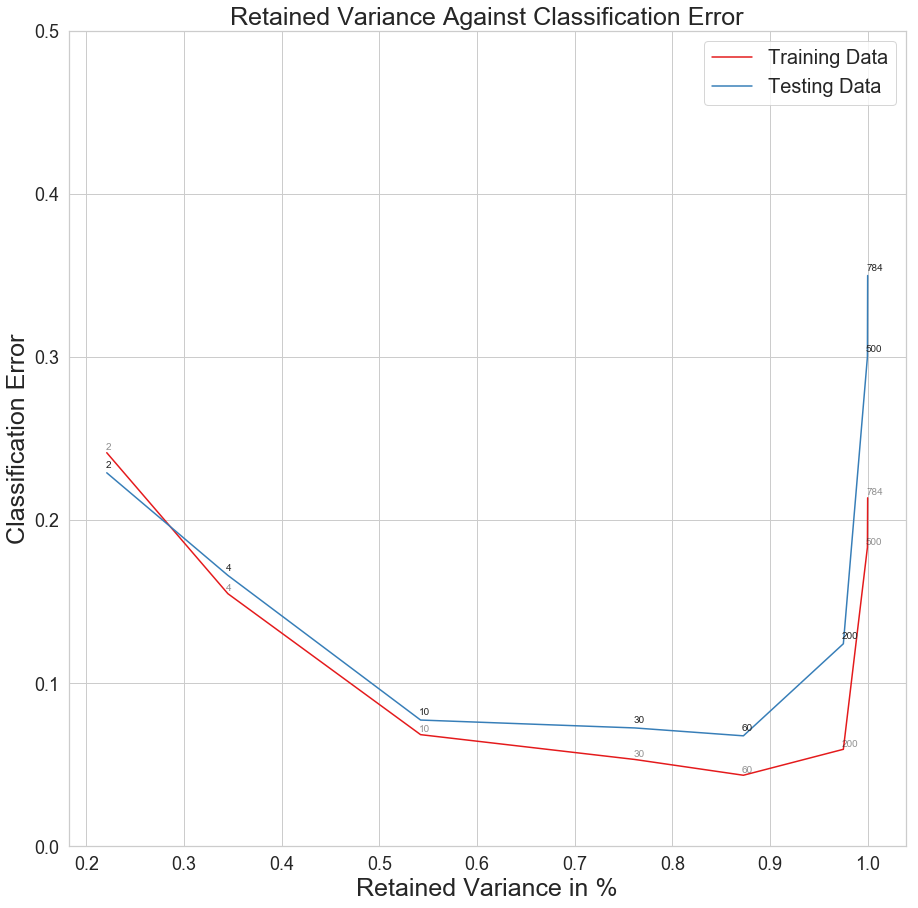

In [0]:
# Plotting classification error against retained variance 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plt.plot(model_retained_variance,model_err_train, label='Training Data') #Plot the retained variance against the train error
plt.plot(model_retained_variance,model_err_test, label='Testing Data') #Plot the retained variance against the test error
plt.xlabel("Retained Variance in %")
plt.ylabel("Classification Error")
plt.title('Retained Variance Against Classification Error')
#Add the components number in each datapoint of the test error:
for (x_var, y_err, component) in zip(model_retained_variance, model_err_test, components):      
    ax.annotate(component, xy=(x_var, y_err), xytext=(-1.5,5), textcoords='offset points') 
#Add the components number in each datapoint of the train error:
for (x_var, y_err, component) in zip(model_retained_variance, model_err_train, components):      
    ax.annotate(component, xy=(x_var, y_err), xytext=(-1.5,3), textcoords='offset points', alpha=0.5)

plt.legend(loc='best')
plt.ylim([0,0.5])
plt.show()

The Naïve Bayes classifier was used to build models for the eight sets of dimensionality reduced data. The classification error and the retained variance for each set was obtained for both the test and train data and can be seen in the figure above.

The testing and training classification errors decrease as the number of components increases, showing a declining underfit as more components are used to train the model. After around 60 components, the model starts to overfit making the test error increment considerably and both this test and the train errors start to separate. When all the components are used the model is overfit.

### 5.	As the class labels are already known, you can use the Linear Discriminant Analysis (LDA) to reduce the dimensionality, plot the data points using the ﬁrst 2 LDA components (display data points of each class with a diﬀerent color). Explain the results obtained in terms of the known classes. Compare with the results obtained by using PCA.

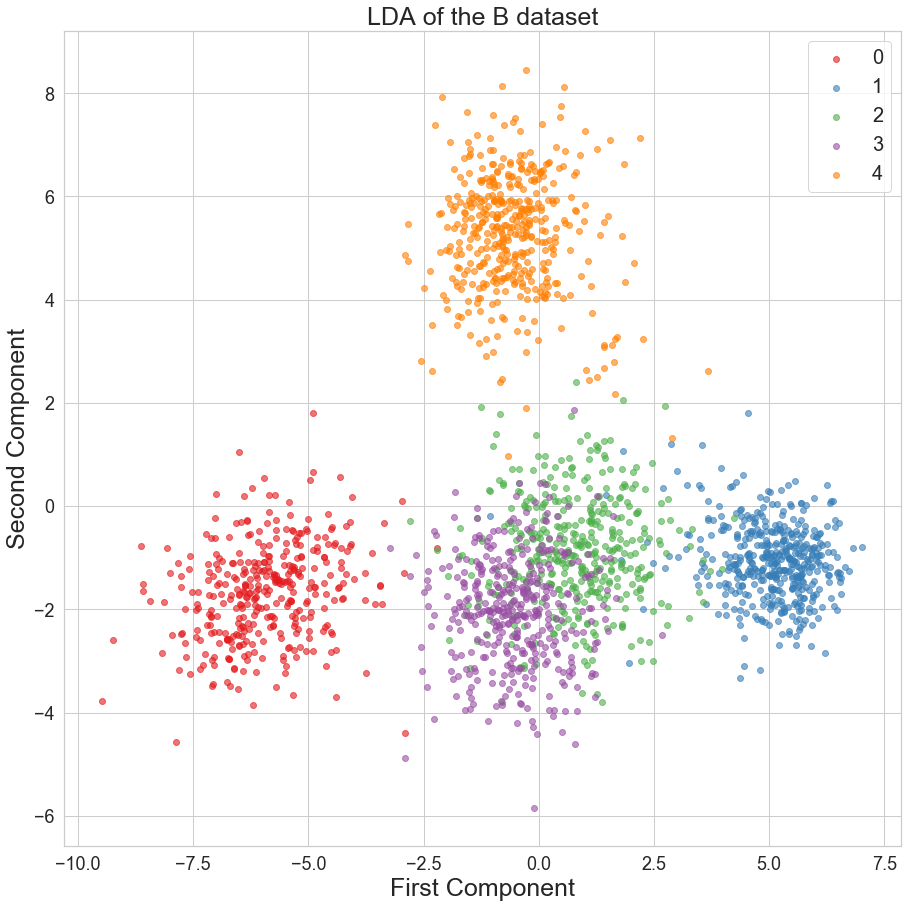

In [0]:
target_names = ['0','1','2','3','4']
#LDA for the dataset using two components
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(df_X, df_y).transform(df_X)

plt.figure(figsize=(15,15))
col=plt.get_cmap('Set1')

for i, target_name in zip([0, 1, 2, 3, 4], target_names):
    colors = col(i)
    plt.scatter(X_r2[df_y == i, 0], X_r2[df_y == i, 1], alpha=0.6, color=colors,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of the B dataset')
plt.xlabel('First Component')
plt.ylabel('Second Component')

plt.show()

Linear Discriminant Analysis (LDA) finds a linear transformation that maximizes the between-class scatter and minimizes the within-class scatter so that the class separability is maximized in the reduced dimensional space [18, 8]. The LDA projection of the Dataset B can be seen in the figure above. The figure displays the different classes as they are visualized in the 2 dimensions created by the first two LDA components, which help increase the difference between the classes of data, and facilitates the distinction between the different groups. By observing the plot as a monochromatic graphic, it can be stated that it would be possible to discern between four and five classes.
Observing the data with each class represented by its own color it is visible that LDA managed to separate the classes 0, 1 and 4 in a more consistent way than PCA. Classes 2 and 3 seem to be more difficult to differentiate no matter which dimension reduction technique is used, but it might be more manageable to classify them using LDA than PCA as in LDA they form more compact groups.



# Question III Nonlinear Dimensionality Reduction (for dataset B)

### 1. Apply LLE to the images of digit '3' only. Visualize the original images by plotting the images corresponding to those instances on 2-D representations of the data based on the first and second components of LLE, see Figure for an example of what this looks like for random location of images on of the number 1-3. Describe qualitatively what kind of variations is captured.

In [0]:
from sklearn import manifold
from matplotlib import offsetbox #Library needed to show an image of the number

In [0]:
y = df_y.values #Assign the labels to the y variable
X =  df_X #Change variable name, for easier viewing
num_neighbors=5 #Number of neighbors to use in Isomap and LLE
num_components=4 #Number of components to obtain for the isomap and LLE functions

In [0]:
def plot_embedding(data_X, data_y, df_dataset, title=None, showNumbers=False, showImages=True):
#Function that allows for the plotting of the numbers found in the dataset, with actual numbers instead of points
# in the graph, with the images as representation for the points (showing only a representation of them and not all,
# as to not saturate the plot) or a combination of both of those settings
# Based on the code of:
#          Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

    #The scaling is needed for the plot to be easier to visualize. Otherwise the data would rest in a corner of the plot
    x_min, x_max = np.min(data_X, 0), np.max(data_X, 0)
    data_X = (data_X - x_min) / (x_max - x_min)

    plt.figure(figsize=(12,12)) #Fix plot size
    ax = plt.subplot(111) #Create a subplot
    if showNumbers==True: #If true visualize the points in the graph as numbers, each group represented with its own color
        for i in range(data_X.shape[0]-1,0,-1):
            plt.text(data_X[i, 0], data_X[i, 1], str(data_y[i]), #Number to show on the plot
                     color=plt.cm.Set1(data_y[i]), #Color of the groups
                     fontdict={'weight': 'bold', 'size': 12}, alpha=0.7) #Font settings for the numbers
    if showImages==True: #If true graph the image obtained from the row of the dataset when reshaped
        if hasattr(offsetbox, 'AnnotationBbox'): # only print thumbnails with matplotlib > 1.0
            shown_images = np.array([[1., 1.]])  # just something big
            for i in range(data_X.shape[0]):
                dist = np.sum((data_X[i] - shown_images) ** 2, 1) #Calculate the distance between the shown images and the data
                if np.min(dist) < 1e-3:
                    continue # don't show points that are too close
                shown_images = np.r_[shown_images, [data_X[i]]]
                imagebox = offsetbox.AnnotationBbox(
                    offsetbox.OffsetImage(df_dataset.iloc[i,:].values.reshape(28,28), cmap=plt.cm.gray_r),
                    data_X[i], frameon=False) #Recreate the image based on the dataset
                ax.add_artist(imagebox) #Show the recreated image on the plot
    plt.xlim(-0.05,1.05) #Change the x limits to make the plot look better
    plt.ylim(-0.05,1.05) #Change the y limits to make the plot look better
    plt.xticks([]), plt.yticks([]) #Do not show the X or Y ticks
#     plt.xlabel('First Component')
#     plt.ylabel('Second Component')
#     plt.legend(loc='best', shadow=False, scatterpoints=1)
    if title is not None: #Show the title if it was given as a parameter
        plt.title(title)
    plt.show()

In [0]:
# Locally linear embedding of the dataset
clf = manifold.LocallyLinearEmbedding(num_neighbors, num_components,
                                      method='standard')
X_lle = clf.fit_transform(X) #Transform the whole matrix
X_lle_proj = X_lle[:,0:2] #Get the first 2 components of the projected X

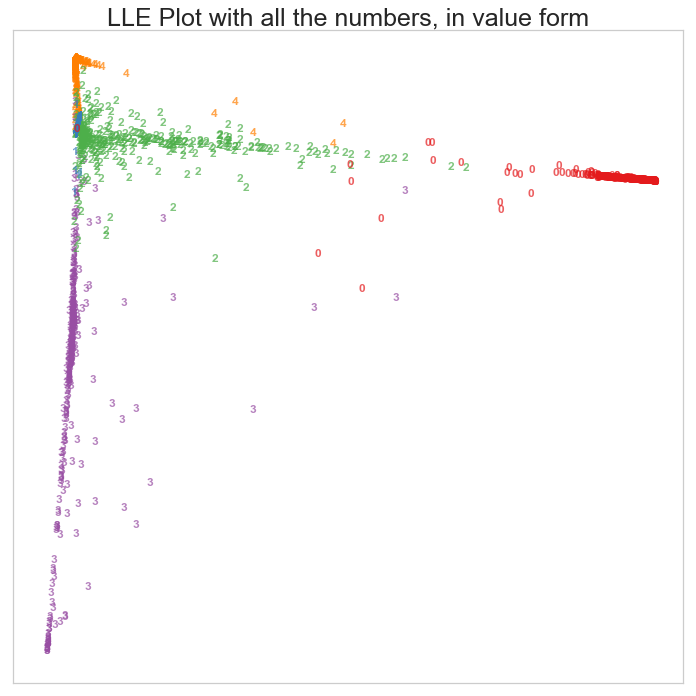

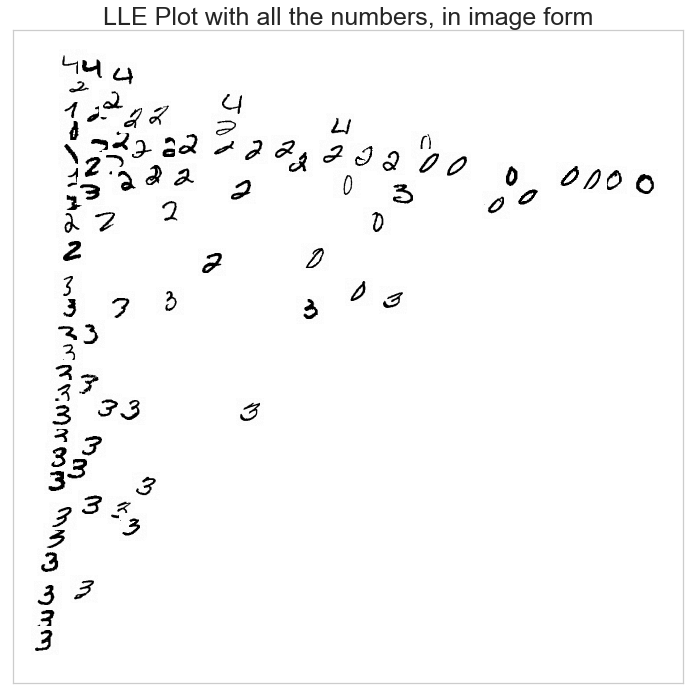

In [0]:
plot_embedding(X_lle_proj,y,df_X, "LLE Plot with all the numbers, in value form",
               True, False) #Plot with the points as colored numbers
plot_embedding(X_lle_proj,y,df_X, "LLE Plot with all the numbers, in image form") #Plot with the number images

In [0]:
#Obtain only the values of the dataset that have the 3 label
df_B_3=(df_B.loc[df_B['gnd'] == 3])
df_X3 = df_B_3.iloc[:,:-1]
df_y3 = df_B_3.iloc[:,-1]

X3 =  df_X3
y3 = df_y3.values

# Locally linear embedding
X_lle3 = clf.transform(X3) #Transform the whole matrix
X3_lle_proj = X_lle3[:,0:2] #Get the first 2 components of the projected X

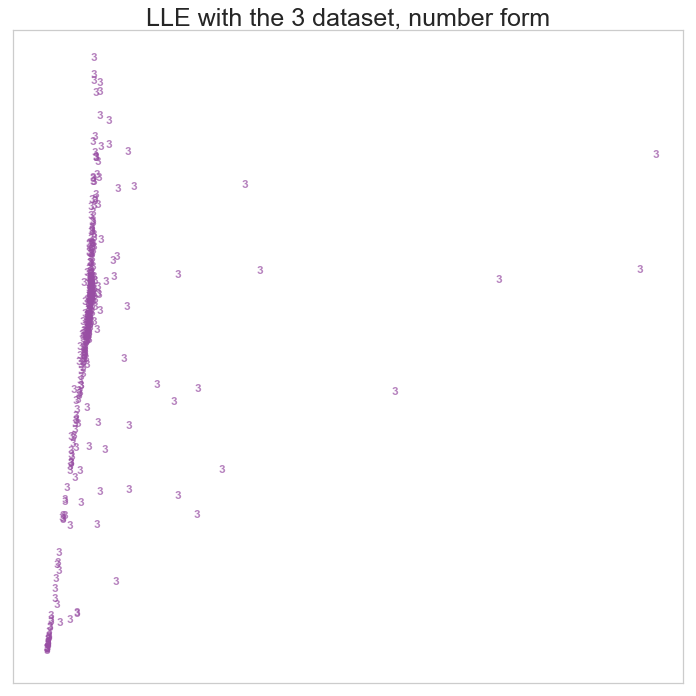

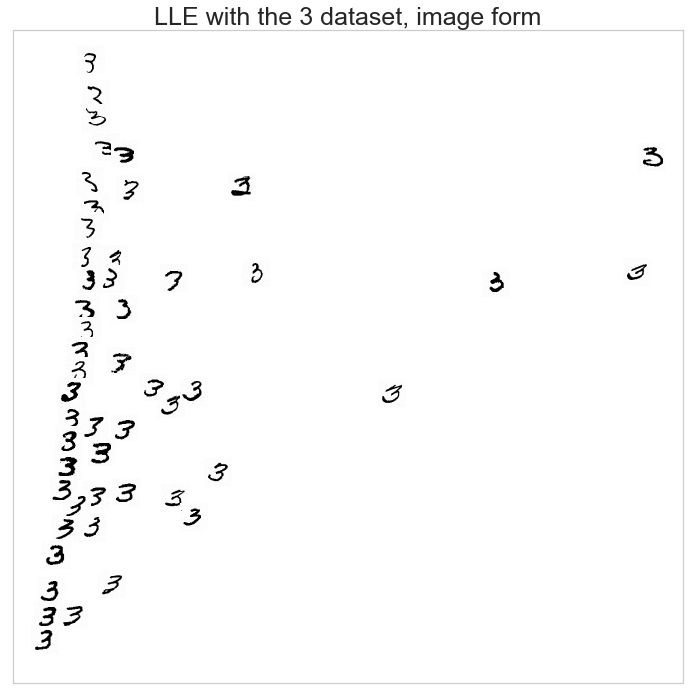

In [0]:
plot_embedding(X3_lle_proj,y3,df_X3,'LLE with the 3 dataset, number form',
               True, False) #Plot with the points as colored numbers
plot_embedding(X3_lle_proj,y3,df_X3,'LLE with the 3 dataset, image form') #Plot with the number images

As the plot might change directions due to the vectors calculated in the LLE transformation, it will be assumed that the majority of the 3 digits should be situated on the leftmost side of the plot.

A plot for the figures of the digit 3 after applying LLE can be seen in the figure above. It can be argued that the 3s that are further down tend to be thicker, while the digits that are near the top of the plot seem to be thinner. The digits present to the right seem to be rounder (and the assumption seems to fit with the logic that the rounder the 3 looks like the more they look like a 0, and the digit 0 is to the right of where the digit 3 is when all the digits are visualized in the same plot). At the same time, the more to the left the digits are, the straighter they seem to become.

# ISOMAP
### 2. Repeat step 1 using the ISOMAP method. Comment on the result. Does ISOMAP do better in some way? Are the patterns being found globally based or locally based?

In [0]:
# Isomap projection
iso_fit = manifold.Isomap(num_neighbors, num_components).fit(X)
X_iso = iso_fit.transform(X) #Isomap for the whole dataset
X3_iso = iso_fit.transform(X3) #Isomap for the 3 dataset

X_iso_proj=X_iso[:,0:2] #Get the first 2 coordinates of the projected X
X3_iso_proj=X3_iso[:,0:2] #Get the first 2 coordinates of the projected X3

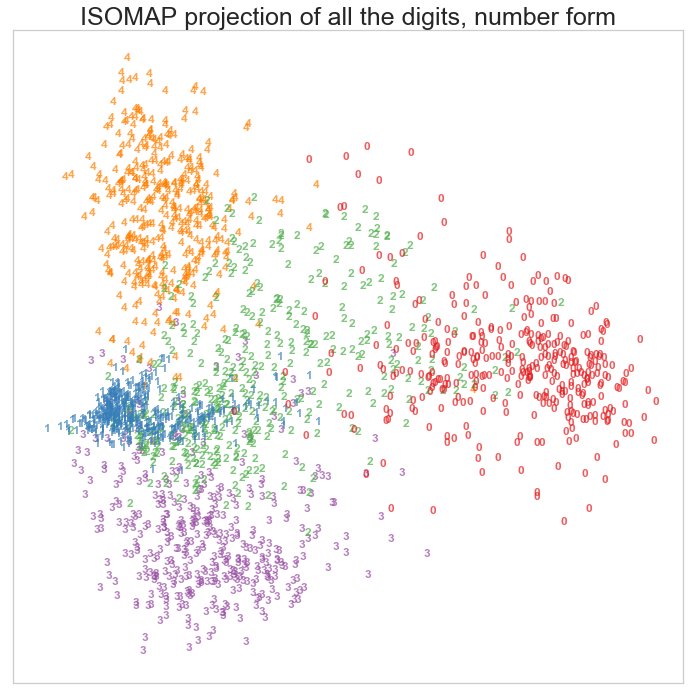

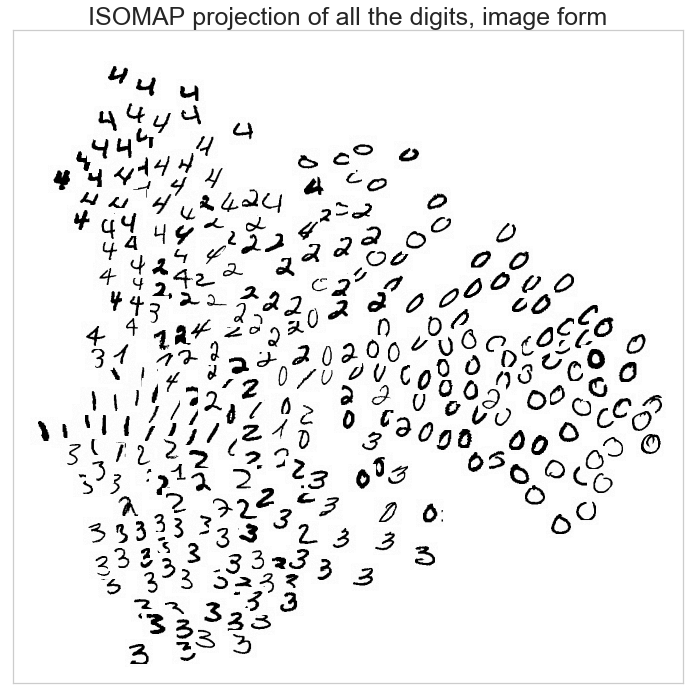

In [0]:
plot_embedding(X_iso_proj,y,df_X,"ISOMAP projection of all the digits, number form",
               True, False) #Plot with the points as colored numbers
plot_embedding(X_iso_proj,y,df_X,"ISOMAP projection of all the digits, image form") #Plot with the number images

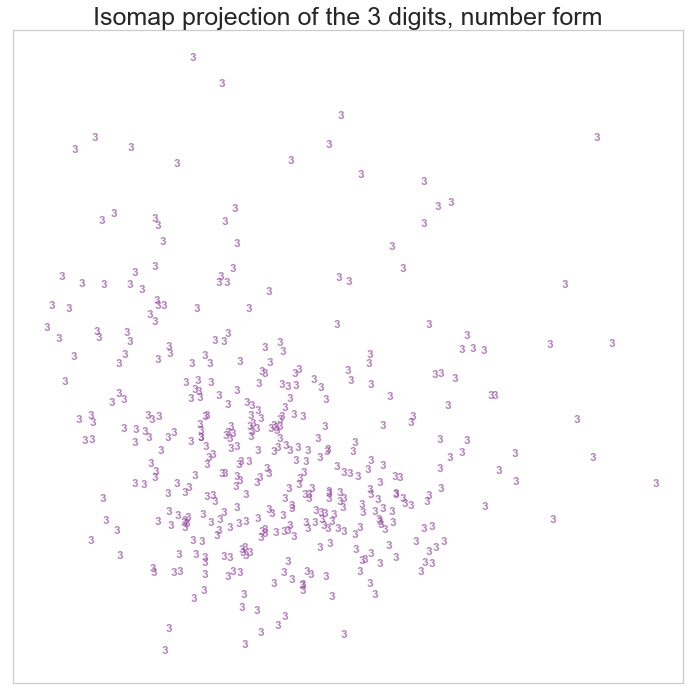

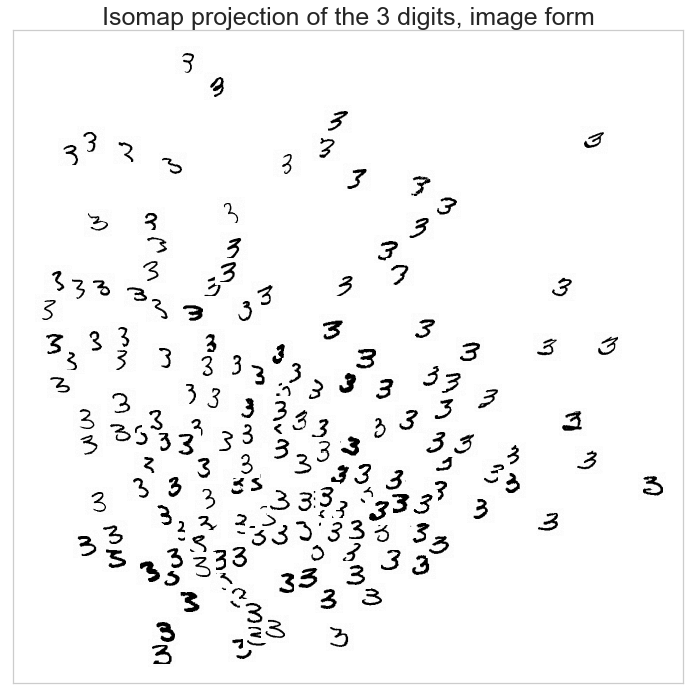

In [0]:
plot_embedding(X3_iso_proj,y3,df_X3,"Isomap projection of the 3 digits, number form",
               True, False) #Plot with the points as colored numbers
plot_embedding(X3_iso_proj,y3,df_X3,"Isomap projection of the 3 digits, image form") #Plot with the number images

As the plot might change directions due to the vectors calculated in the ISOMAP transformation, the orientation of the plots will be based upon the plot that has all the 5 digits: the 0 digit should be situated on the rightmost side of the plot and the digit 3 should be situated on the lower left part of the plot.

A plot of the figures of the digit 3 after applying ISOMAP can be seen in the figure above. The differences between the digits seem to be less clear, but it could be argued that the closer they are to the top rightmost part of the plot the more slanted they are. Furthermore, it also seems that the closer they are to the right side of the plot the rounder they become (this also fits with what can be found when viewing all the digits, as the 0 is to the right of the 3). It also seems that the closer they get to the center where they are all clustered together the more they resemble a traditional 3.

The patterns were globally based for ISOMAP and locally based for LLE.

### 3. Use the Naive Bayes classifier to classify the dataset based on the projected 4-dimension representations of the LLE and ISOMAP. Train your classifier by randomly selected 70% of data, and test with remained 30%. Retrain for multiple iterations (using difierent random partitions of the data) and use the average accuracy of multiple runs for your analysis. Justify why your number of iterations was suficient. Based on the average accuracies compare their performance with PCA and LDA. Discuss the result.

In [0]:
#Create a coss-validation technique which uses the ShuffleSplit technique to separate the data in two parts according to the
#parameter test_ratio
#It runs a number of times according to num_split, and returns the average accuracy value for that cross-validation
def cro_val(data_X, data_y, num_split, test_ratio):
    classifier = GaussianNB()
    score = cross_val_score(classifier, data_X, data_y, cv=ShuffleSplit(num_split, test_ratio))
    return np.average(score) * 100

In [0]:
#Number of iterations to run in each of the classifiers
num_iterations=[(i + 1) * 10 for i in range(50)]

In [0]:
#Calculate the average score for the LLE
lle_score = [cro_val(X_lle, y, i, 0.3) for i in num_iterations]

In [0]:
#Calculate the average score for the ISOMAP
iso_score = [cro_val(X_iso, y, i, 0.3) for i in num_iterations]

In [0]:
#Calculate the average score for the PCA
pca = PCA(n_components = num_components)
X_pca = pca.fit_transform(X) #Transform the whole matrix
pca_score = [cro_val(X_pca, y, i, 0.3) for i in num_iterations]

In [0]:
#Calculate the average score for the LDA
lda = LinearDiscriminantAnalysis(n_components = num_components)
X_lda = lda.fit_transform(X, y) #Transform the whole matrix
lda_score = [cro_val(X_lda, y, i, 0.3) for i in num_iterations]

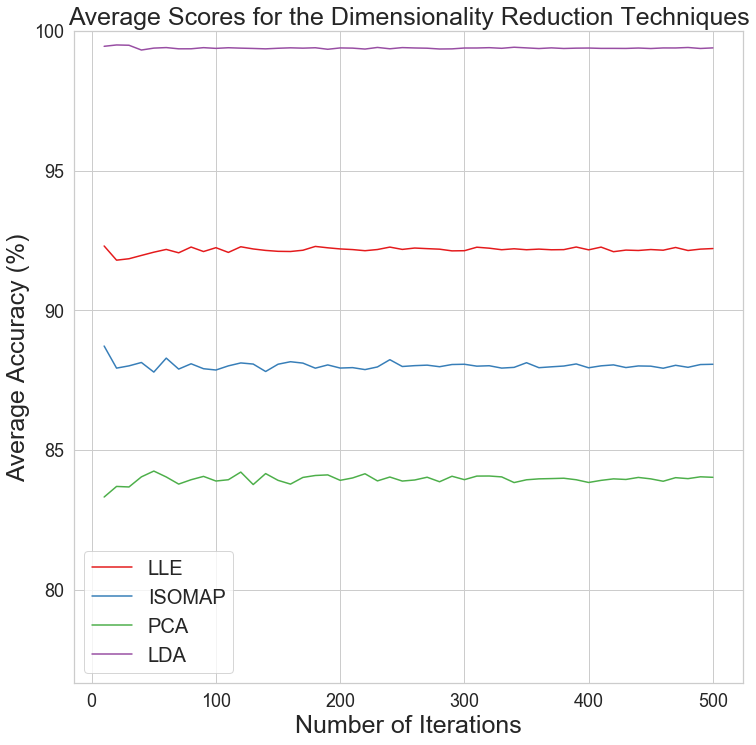

In [0]:
#Plot all of the dimensionality reduction techniques in the same plot
plt.figure(figsize = (12,12))
plt.plot(num_iterations, lle_score, label = 'LLE')
plt.plot(num_iterations, iso_score, label = 'ISOMAP')
plt.plot(num_iterations, pca_score, label = 'PCA')
plt.plot(num_iterations, lda_score, label = 'LDA')
axes = plt.gca()
plt.ylim(np.min(lle_score + iso_score + pca_score + lda_score) * 0.92, 100)
plt.legend(loc = 'best')
plt.title('Average Scores for the Dimensionality Reduction Techniques')
plt.xlabel('Number of Iterations')
plt.ylabel('Average Accuracy (%)')
plt.show()

In [0]:
#Construct a DataFrame with the averages and the standard deviations of the 4 techniques, for easier visualization:
score_stats=pd.DataFrame([np.mean(lle_score),np.std(lle_score)],['Mean','Std. Deviation'], columns=['LLE'])
score_stats=pd.concat([score_stats, pd.DataFrame([np.mean(iso_score),np.std(iso_score)],
                                                 ['Mean','Std. Deviation'], columns=['ISOMAP'])], axis=1)
score_stats=pd.concat([score_stats, pd.DataFrame([np.mean(pca_score),np.std(pca_score)],
                                                 ['Mean','Std. Deviation'], columns=['PCA'])], axis=1)
score_stats=pd.concat([score_stats, pd.DataFrame([np.mean(lda_score),np.std(lda_score)],
                                                 ['Mean','Std. Deviation'], columns=['LDA'])], axis=1)
score_stats

,LLE,ISOMAP,PCA,LDA
Mean,92.167191,88.027145,83.960076,99.388812
Std. Deviation,0.095462,0.137030,0.147333,0.029831


LDA had the best performance of the 4 techniques, followed by LLE, ISOMAP and then PCA. As LDA is a supervised approach it had the advantage of knowing the class classification beforehand, therefore making better predictions and thus obtaining a higher accuracy score. PCA had the worst performance of the 4 techniques. PCA is a linear non-supervised approach, and, as it was seen in the PCA figure, this technique was not able to construct distinguishable groups with a clear class separation. LLE and ISOMAP had an average performance compared to the other two techniques. These unsupervised nonlinear techniques obtained better results than the unsupervised linear technique (PCA) but could not equal the results of the supervised approach (LDA).

Running the model with various iterations did not enhance the results significantly. This might be due to the fact that the training set was comprised of 70% of the samples (1446 samples) which is a substantial size and sufficient to train the model correctly.


# References

[1] 	Pandas Project, "Tutorials - pandas 0.23.4 documentation," Documentation on the use of the pandas library, [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/tutorials.html. [Accessed 19 January 2019].

[2] 	The Scipy Community, "Statistical functions (scipy.stats) - SciPy v0.14.0 Reference Guide," Documentation on the use of the SciPy library, 11 May 2014. [Online]. Available: https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html. [Accessed 8 January 2019].

[3] 	The SciPy Community, "Statistics - NumPy v.1.14.1 Manual," Documentation on the use of the NumPy library, 16 April 2018. [Online]. Available: https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.statistics.html. [Accessed 8 January 2019].

[4] 	The Matplotlib Development Team, "matplotlib.pyplot.hist - Matplotlib 3.0.2 documentation," Documentation on the use of the Matplotlib library, 11 November 2018. [Online]. Available: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html. [Accessed 8 January 2019].

[5] 	The Matplotlib Development Team, "Histograms - Matplotlib 3.0.2 documentation," Documentation on the use of the Matplotlib library, 11 November 2018. [Online]. Available: https://matplotlib.org/gallery/statistics/hist.html. [Accessed 9 January 2019].

[6] 	B. Solomon, "Python Plotting with Matplotlib (Guide)," Real Python, 28 February 2018. [Online]. Available: https://realpython.com/python-matplotlib-guide/. [Accessed 15 January 2018].

[7] 	S. Raschka, "About Feature Scaling and normalization," Sebastian Raschka, 11 July 2014. [Online]. Available: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization. [Accessed 15 January 2019].

[8] 	SciKit-learn developers, "Comparison of LDA and PCA 2D projection of Iris dataset - scikit learn 0.20.2 dcumentation," Scikit-learn, [Online]. Available: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html. [Accessed 16 February 2019].

[9] 	M. Waskom, "seaborn: statistical data visualization - seaborn 0.9.0 documentation," Documentation on th euse of the seaborn library, [Online]. Available: https://seaborn.pydata.org/. [Accessed 22 January 2019].

[10] 	Pandas Project, "Working with missing data - pandas 0.24.1 documentation," Documentation on the use of the Pandas library, [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#interpolation. [Accessed 15 January 2019].

[11] 	S. Moritz, "imputeTS: Time Series Missing Value Imputation in R," The R Journal, vol. 9, pp. 207 - 218, 2017. 

[12] 	Tallahassee Community College Learning Commons, "Z-scores-and-the-Empirical-Rule," Instructional aid on Z scores and the empirical rule, 24 May 2016. [Online]. Available: https://www.tcc.fl.edu/media/divisions/learning-commons/top-5-resources/math/statistics/Z-scores-and-the-Empirical-Rule.pdf. [Accessed 15 January 2019].

[13] 	J. K. Shapiro, "Z-Score," in Encyclopedia of Survey Research Methods, Thousand Oaks, Sage Publications, Inc, 2011, p. 968.

[14] 	L. Sullivan and W. W. LaMorte, "InterQuartile Range (IQR)," Boston University School of Public Health, 17 May 2016. [Online]. Available: http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/bs704_summarizingdata7.html. [Accessed 15 February 2019].

[15] 	Pat, "Winsorization," R-bloggers, 30 June 2011. [Online]. Available: https://www.r-bloggers.com/winsorization/. [Accessed 16 February 2019].

[16] 	The SciPy Community, "scipy.stats.normaltest - SciPy v1.2.1 Reference Guide," Documentation on the use of the SciPy library, 10 February 2019. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html. [Accessed 15 February 2019].

[17] 	Tableau, "Calculate Z-scores," Tableau Software, 2019. [Online]. Available: https://onlinehelp.tableau.com/current/pro/desktop/en-us/calculating_z_scores.htm. [Accessed 16 February 2019].

[18] 	C. H. Park, H. Park and P. Pardalos, "A Comparative Study of Linear and Nonlinear Feature Extraction Methods," in Fourth IEEE International Conference on Data Mining (ICDM'04), Brighton, UK, UK, 2004. 